Importing Libraries

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Common Variables

In [2]:
#---------- Path of the Training dataset 1 -----------------#
TRANING_DATASET_1 = "C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/new/Dataset 1/"

#----------- Path of the Noisy dataset 1 -------------------#
NOISY_DATASET_1 = "C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/new/Noisy Dataset 1/"

#---------- Path of the Training dataset 2 -----------------#
TRANING_DATASET_2 = "C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/new/Dataset 2/"

#----------- Path of the Noisy dataset 2 -------------------#
NOISY_DATASET_2 = "C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/new/Noisy Dataset 2/"

#---------- Required Standard Deviations -----------------#
STANDARD_DEVIATIONS = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]

TITLE_1_NOISELESS = "Graph of Fh and Ffa vs. Noiseless Alphanumeric Imagery (16x16 pixels) for Autoassociative DNN of Dataset 1"
TITLE_1_NOISE = "Graph of Fh and Ffa vs. Noise Standard Deviation for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative DNN of Dataset 1"

TITLE_2_NOISELESS = "Graph of Fh and Ffa vs. Noiseless Alphanumeric Imagery (16x16 pixels) for Autoassociative DNN of Dataset 2"
TITLE_2_NOISE = "Graph of Fh and Ffa vs. Noise Standard Deviation for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative DNN of Dataset 2"

TITLE_3_NOISELESS = "Graph of Fh and Ffa vs. Noiseless Alphanumeric Imagery (16x16 pixels) for Autoassociative DNN of Test Dataset"

Common Functions

In [3]:
# Function to convert an image to numpy array
import matplotlib.pyplot as plt

def imagetensor(imagedir):
  '''
    imagedir: The directory/path of the images to be converted to NumPy Array

  '''
  temp=[]
  for image  in os.listdir(imagedir):
    im= Image.open(imagedir+image)
    im=im.convert('L')
    temp.append(np.array(im))
  
  images=np.array(temp)
  images=np.where(images<np.mean(images),0,1).astype('float64')
  return images

# Function to convert NumPy Array to 0s and 1s based on the thresold value
def convert_array_to_0_and_1(array):
  return np.where(array<np.mean(array),0,1).astype('float64')

# Function to display the results of the predicted images
def display(oi,pi,single_line=False):
  '''
    oi: Original Image data
    pi: Predicted Image data
  
  '''
  for i in range(oi.shape[0]):
    fig, axis= plt.subplots(1,2) if single_line else plt.subplots(2,sharex=True)
    plt.subplots_adjust(top=1)
    axis[0].set_title('Original Image')
    axis[1].set_title('Predicted Image')
    axis[0].imshow(oi[i].reshape(16,16),cmap="gray",)
    axis[1].imshow(pi[i].reshape(16,16),cmap="gray")


def plot_data(all_metrics, title, noiseless=False):
    fig,ax = plt.subplots()

    ax.set_ylabel("Fh and Ffa")
    if not noiseless:
      ax.set_title(title)
      ax.set_xlabel("Gaussian Noise Level (stdev, at 10 pct xsecn)")
      ax.set_xlim(0.0009, 0.12)
      ax.set_ylim(0,1.05)
      ax.set_xscale("log")
      ax.set_xticks(STANDARD_DEVIATIONS)
      ax.set_xticklabels(STANDARD_DEVIATIONS)

      for i in range(10):
        for j in STANDARD_DEVIATIONS:
            ax.plot(j, all_metrics[j][i][0], 'o', color='black')
            ax.plot(j, all_metrics[j][i][1], 'o', color='black', markerfacecolor='none')
    else:
      ax.set_title(title)
      ax.set_xticks([0])
      ax.set_xticklabels(["Noiseless Data"])
      for i in range(10):
            ax.plot(0, all_metrics[i][0], 'o', color='black')
            ax.plot(0, all_metrics[i][1], 'o', color='black', markerfacecolor='none')


    plt.show()

In [4]:
#---------- Importing the training dataset 1 -----------------#
X1_train = imagetensor(TRANING_DATASET_1)

#---------- Importing the training dataset 2 -----------------#
X2_train = imagetensor(TRANING_DATASET_2)

#---------- Importing the testing dataset 1 -----------------#
X1_test = imagetensor(TRANING_DATASET_1)

#---------- Importing the testing dataset 2 -----------------#
X2_test = imagetensor(TRANING_DATASET_2)



#---------- Flatenning the array to feed it as input nodes to the model -----------------#
X1_train = X1_train.reshape(X1_train.shape[0],1,256)
X2_train = X2_train.reshape(X2_train.shape[0],1,256)

X1_test = X1_test.reshape(X1_test.shape[0],1,256)
X2_test = X2_test.reshape(X2_test.shape[0],1,256)
print(X1_train.shape,X1_train.dtype)

(36, 1, 256) float64


Creating Model for Dataset 1

In [5]:
#---------- Creating the model for dataset 1 -----------------#
#---------- Using Relu as Activation Function -----------------#
#---------- Configuring the model with 256 Input and Output nodes -----------------#
ds1_model = keras.Sequential([
    keras.layers.Dense(256,activation=tf.nn.relu,input_shape=(1,256)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(256,activation=tf.nn.relu)
])

#------- Using Mean Squared Error as the loss function --------------#
ds1_model.compile(optimizer='Adam', loss='mean_squared_error')

print('Model Summary')
ds1_model.summary()

#------- Training the model --------------#
ds1_model.fit(X1_train,X1_test,epochs=150)

Model Summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 256)            65792     
_________________________________________________________________
dropout (Dropout)            (None, 1, 256)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 64)             16448     
_________________________________________________________________
dense_2 (Dense)              (None, 1, 64)             4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1, 256)            16640     
Total params: 103,040
Trainable params: 103,040
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
2/2 [==============================] - 1s 3ms/step - loss: 0.4386
Epoch 2/150
2/2 [=======

Predicting Model 1 with Test data for Dataset 1

(36, 1, 256) (36, 1, 256)


C:\Users\venky\AppData\Local\Temp\ipykernel_5956\4185480150.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axis= plt.subplots(1,2) if single_line else plt.subplots(2,sharex=True)


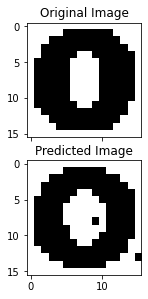

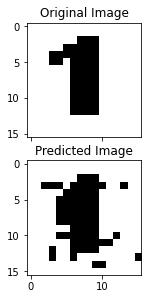

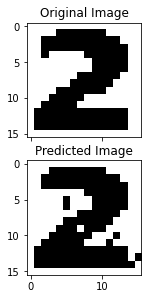

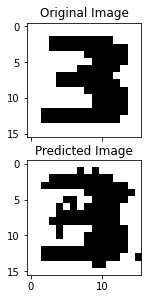

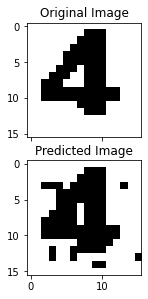

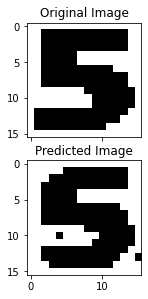

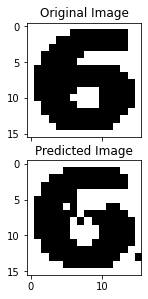

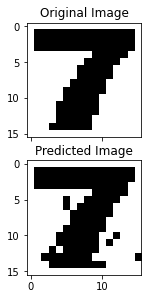

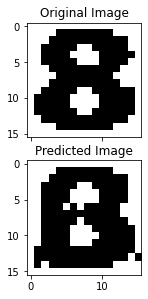

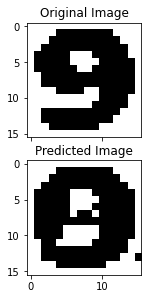

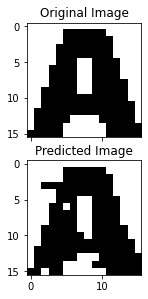

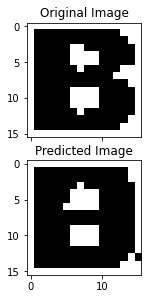

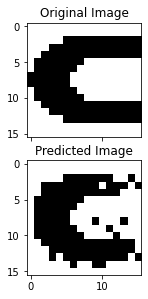

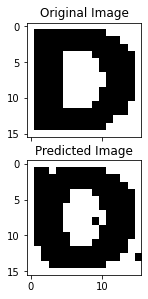

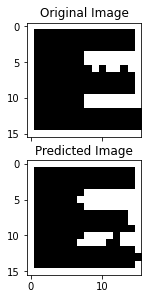

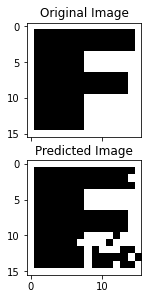

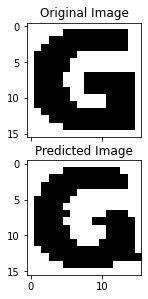

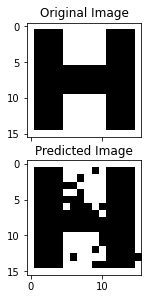

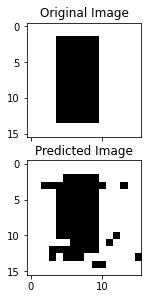

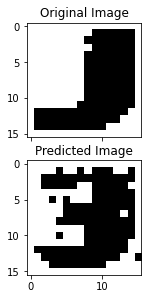

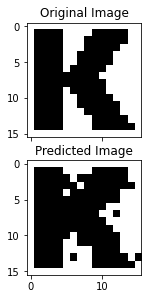

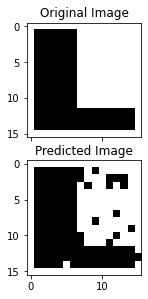

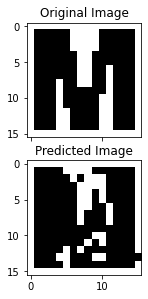

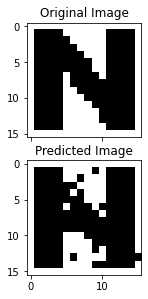

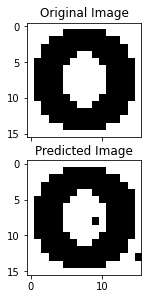

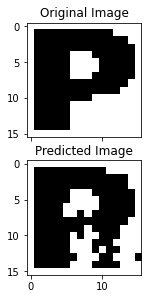

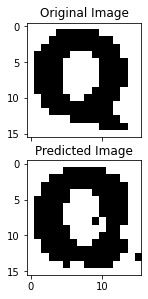

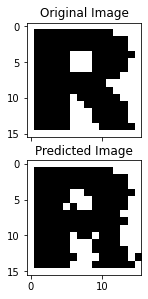

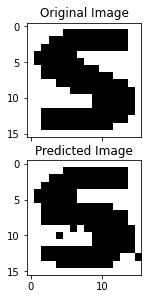

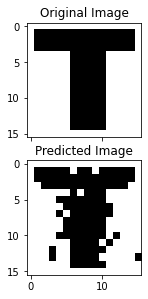

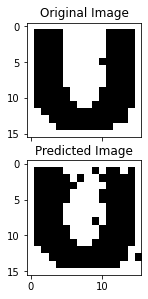

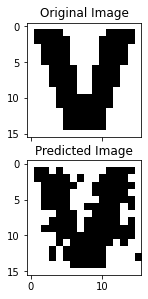

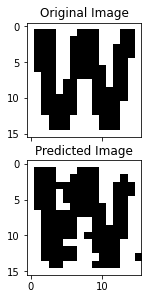

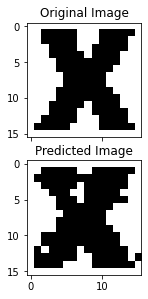

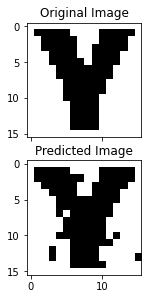

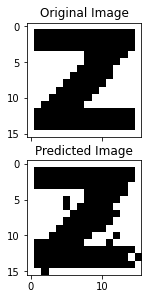

In [6]:
#------- Predicting the dataset with the trained model --------------#
X1_predict = ds1_model.predict(X1_test)

X1_predict = convert_array_to_0_and_1(X1_predict)
X1_test = convert_array_to_0_and_1(X1_test)
print(X1_predict.shape,X1_test.shape)

#------- Displaying the results of the predictions --------------#
display(X1_test,X1_predict)

Creating Model for Dataset 2

In [7]:
#---------- Creating the model for dataset 2 -----------------#
#---------- Using Relu as Activation Function -----------------#
#---------- Configuring the model with 256 Input and Output nodes -----------------#
ds2_model = keras.Sequential([
    keras.layers.Dense(256,activation=tf.nn.relu,input_shape=(1,256)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(256,activation=tf.nn.relu)
])

#------- Using Mean Squared Error as the loss function --------------#
ds2_model.compile(optimizer='Adam', loss='mean_squared_error')

print('Model Summary')
ds2_model.summary()

#------- Training the model --------------#
ds2_model.fit(X2_train, X2_test,epochs=150)

Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1, 256)            65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1, 64)             16448     
_________________________________________________________________
dense_6 (Dense)              (None, 1, 64)             4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1, 256)            16640     
Total params: 103,040
Trainable params: 103,040
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
2/2 [==============================] - 1s 4ms/step - loss: 0.4937
Epoch 2/150
2/2 [=====

Predicting Model 2 with Test data for Dataset 2

(36, 1, 256) (36, 1, 256)


C:\Users\venky\AppData\Local\Temp\ipykernel_5956\4185480150.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axis= plt.subplots(1,2) if single_line else plt.subplots(2,sharex=True)


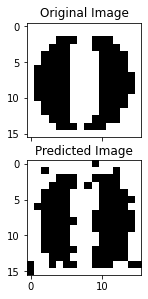

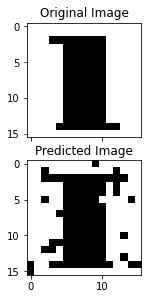

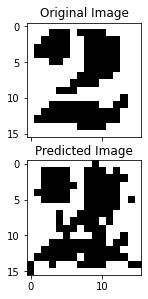

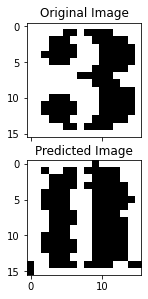

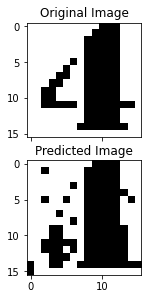

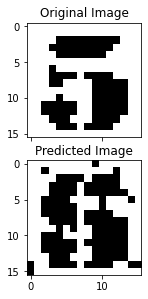

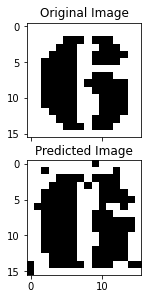

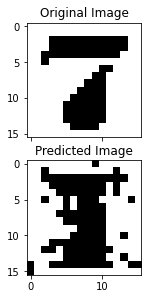

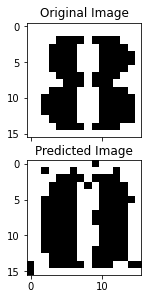

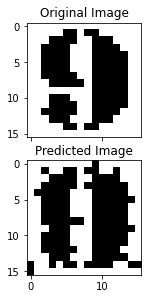

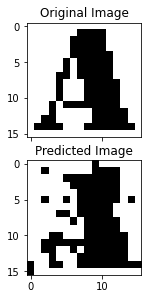

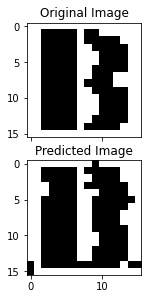

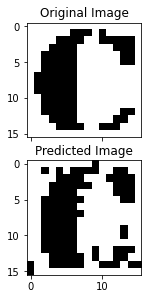

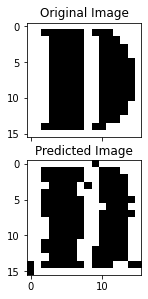

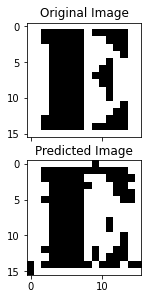

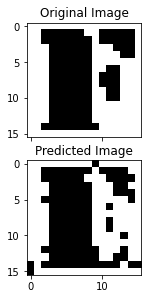

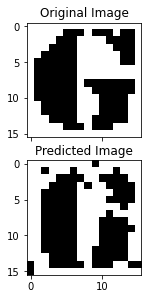

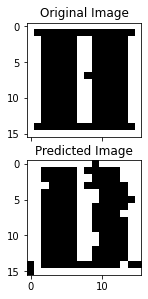

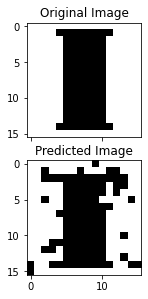

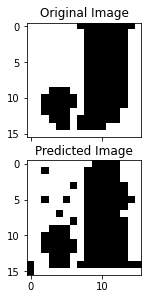

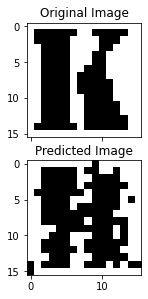

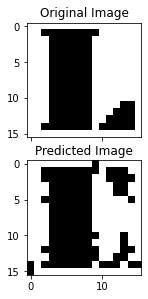

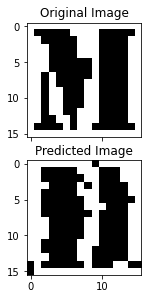

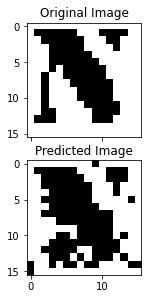

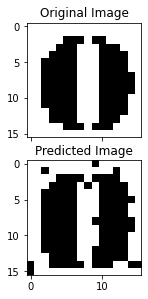

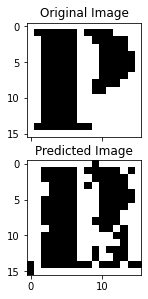

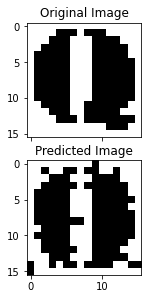

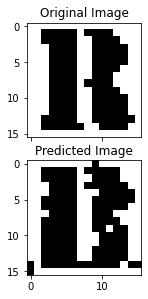

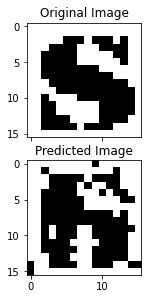

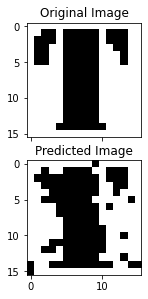

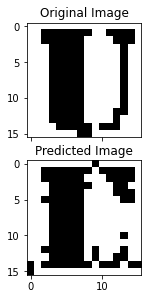

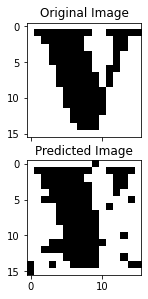

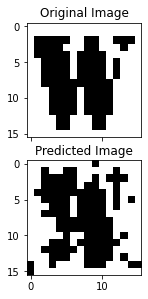

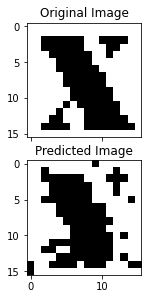

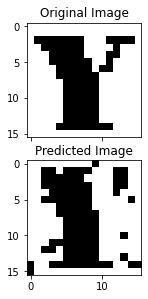

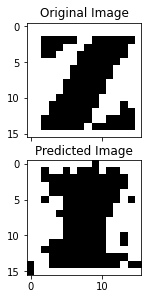

In [8]:
#------- Predicting the dataset with the trained model --------------#
X2_predict = ds2_model.predict(X2_test)

X2_predict = convert_array_to_0_and_1(X2_predict)
X2_test = convert_array_to_0_and_1(X2_test)
print(X2_predict.shape,X2_test.shape)

#------- Displaying the results of the predictions --------------#
display(X2_test,X2_predict)

Adding Noise to Images for Dataset 1 and Dataset 2

In [9]:
#------- Function to generate Gaussian Noise at 25 random pixels in the Image --------------#
def noisy(images, noisy_path):
    '''
        images: list of images to add noise to
    '''
    for std in STANDARD_DEVIATIONS:
        for image_name, image in enumerate(images):
            row,col= image.shape
            noise_pixels=np.ones([16,16],dtype='float64')
            mean = 0

            #------- Generating gaussian noise with required standard deviation --------------#        
            gauss = np.random.normal(mean,std**0.5,(row,col))
            for _ in range(25):
                x=np.random.choice(16)
                y=np.random.choice(16)
                noise_pixels[x][y]=gauss[x][y]
            
            #------- Adding the generated noise to the image --------------#
            noisy = image + noise_pixels
            noisy = convert_array_to_0_and_1(noisy)

            #------- Saving the Noisy Image to Noisy Folder --------------#
            plt.imsave(f"{noisy_path}{std}/{image_name}.jpg",noisy,cmap='gray')
    return noisy


#------- Adding noise to dataset 1 --------------#
noisy(imagetensor(TRANING_DATASET_1), NOISY_DATASET_1)

#------- Adding noise to dataset 2 --------------#
noisy(imagetensor(TRANING_DATASET_2), NOISY_DATASET_2)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,

Predicting Noise Added Images over Original Images for Dataset 1

Predictions for Noisy data with Standard Deviation


C:\Users\venky\AppData\Local\Temp\ipykernel_5956\4185480150.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axis= plt.subplots(1,2) if single_line else plt.subplots(2,sharex=True)


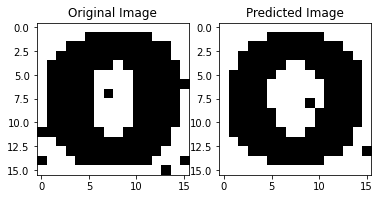

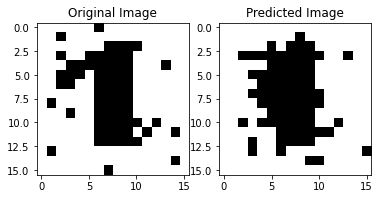

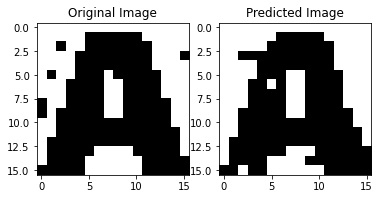

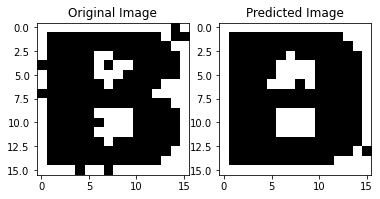

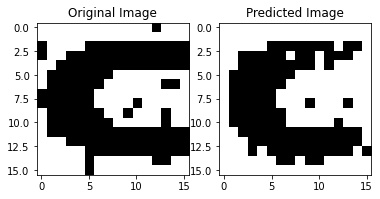

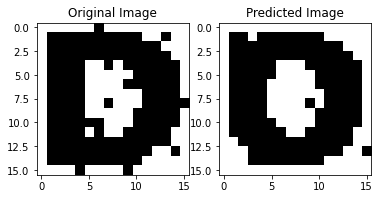

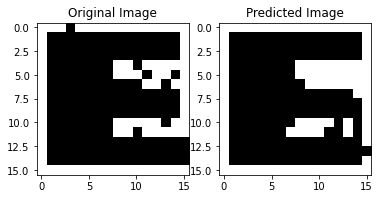

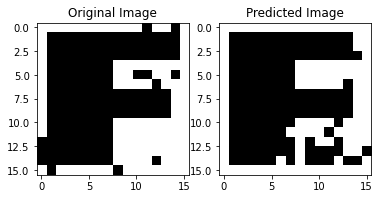

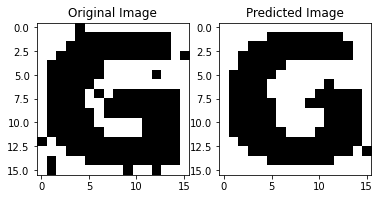

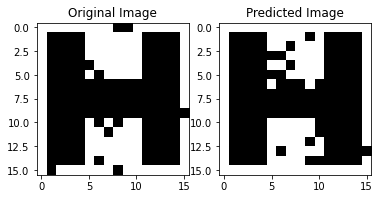

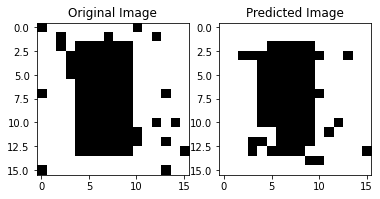

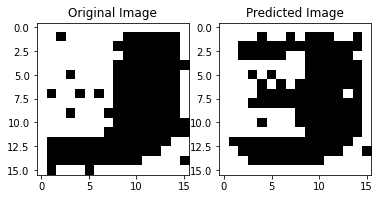

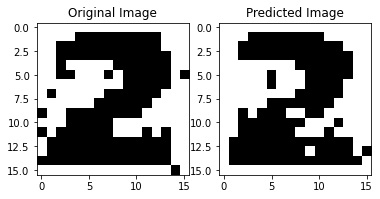

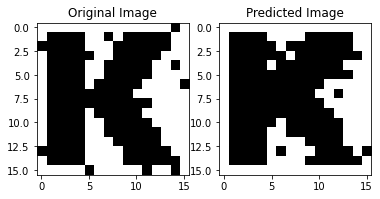

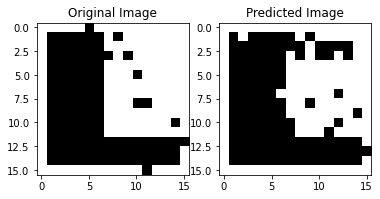

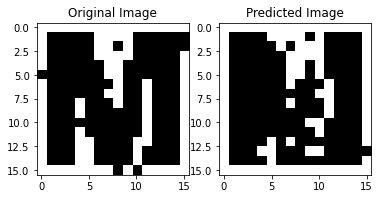

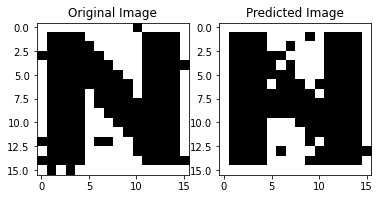

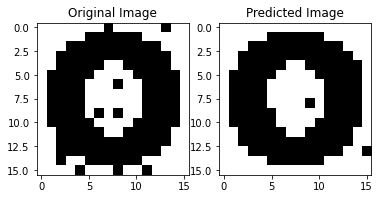

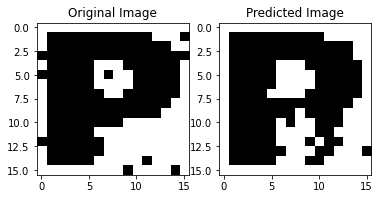

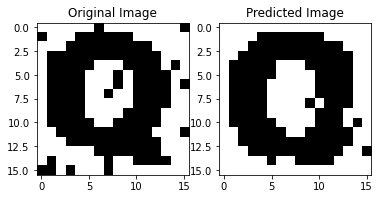

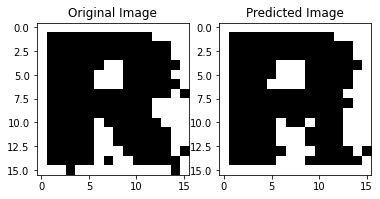

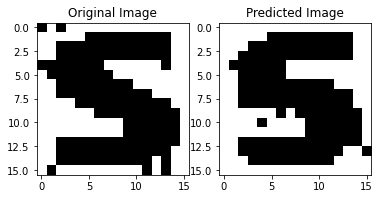

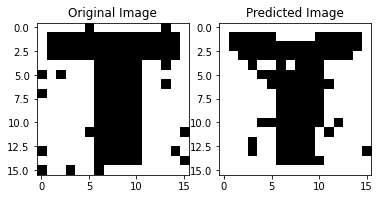

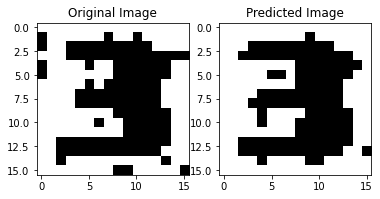

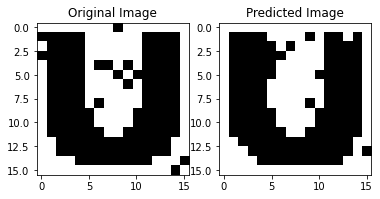

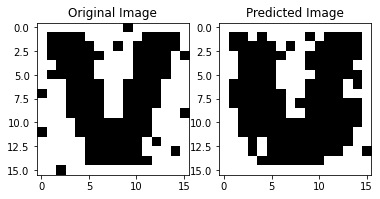

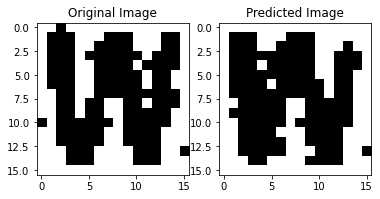

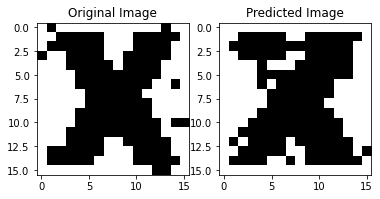

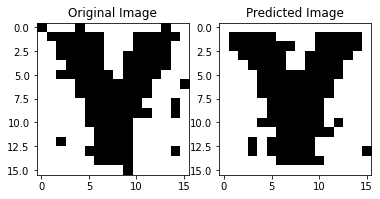

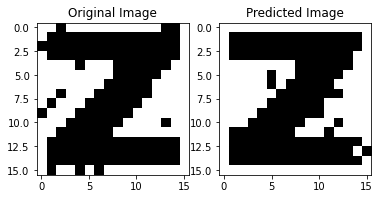

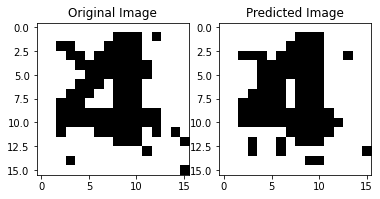

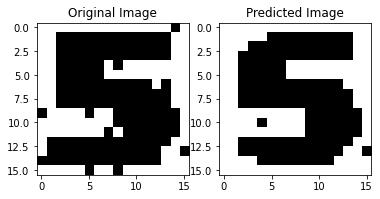

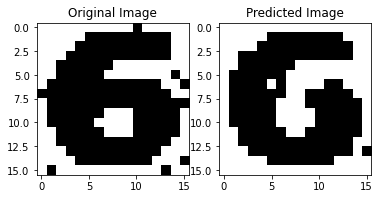

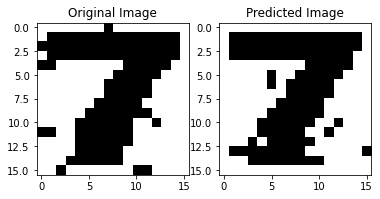

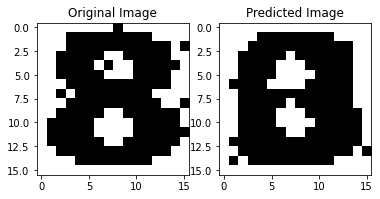

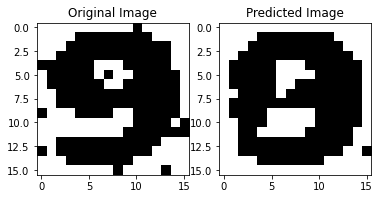

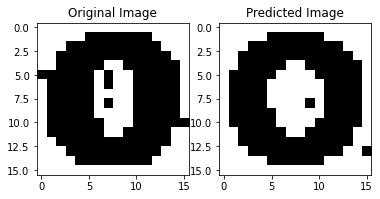

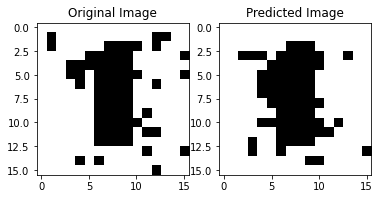

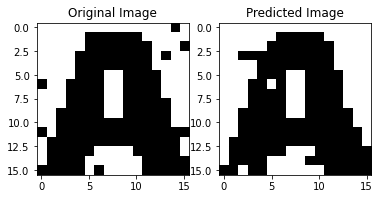

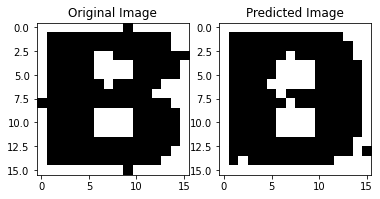

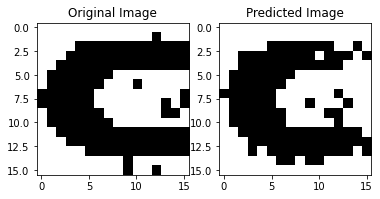

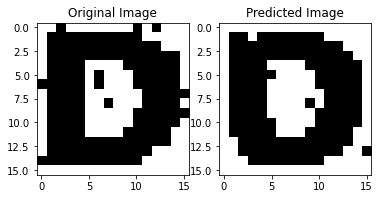

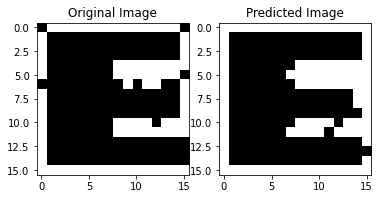

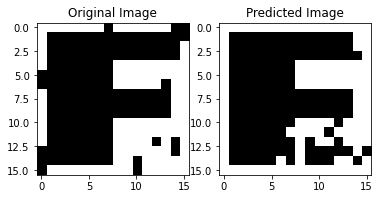

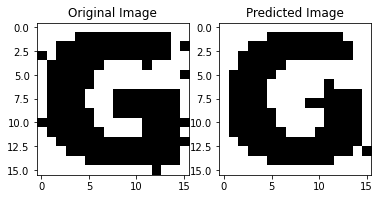

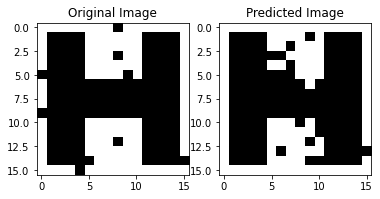

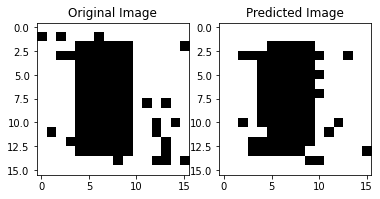

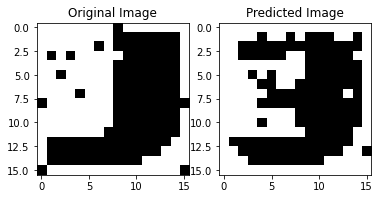

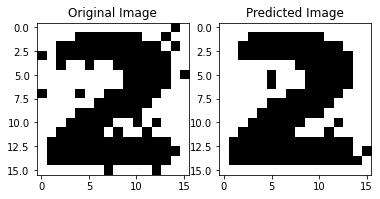

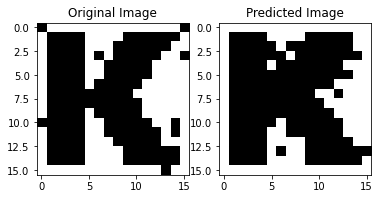

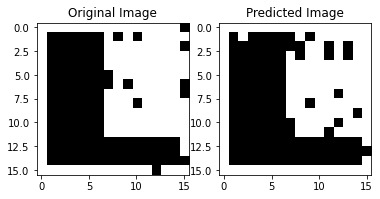

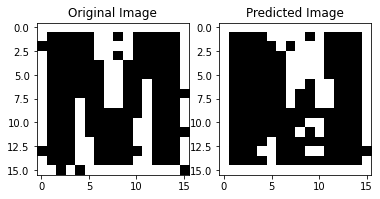

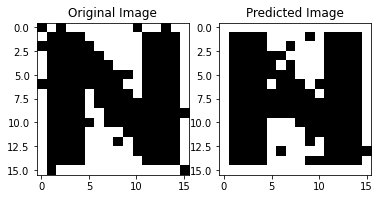

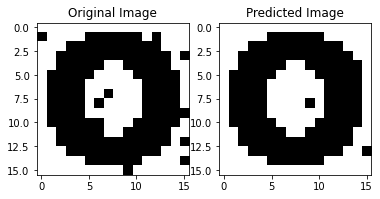

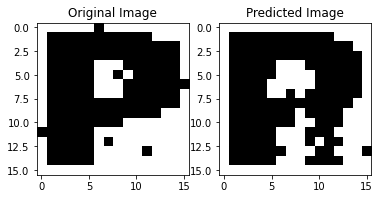

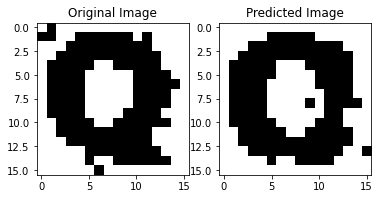

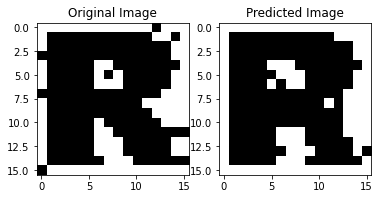

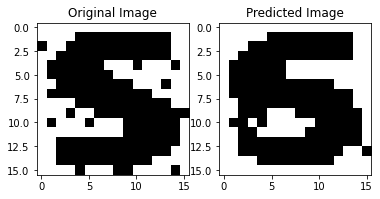

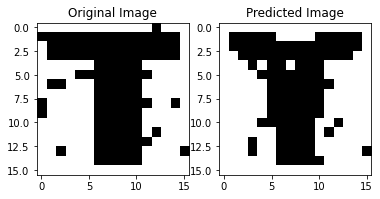

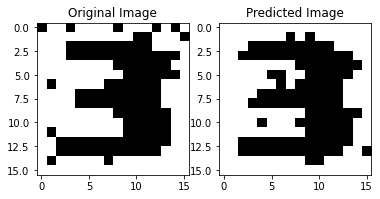

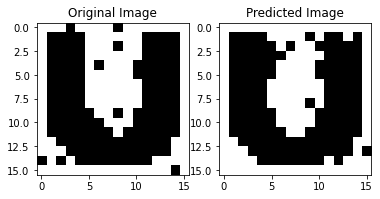

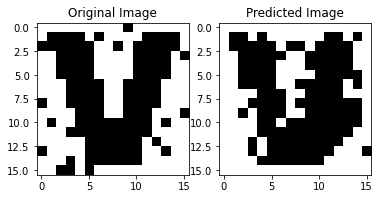

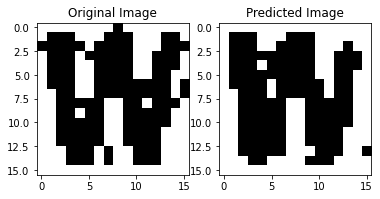

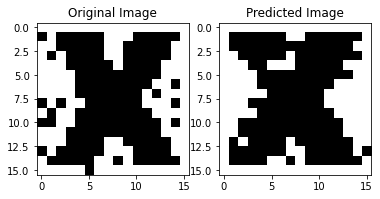

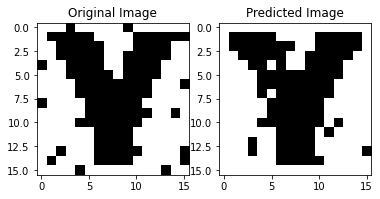

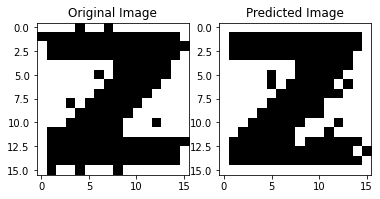

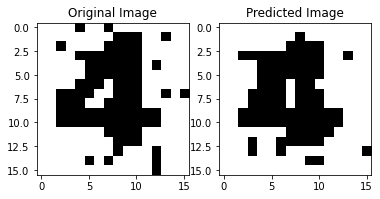

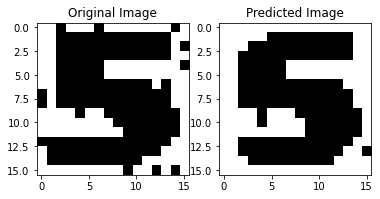

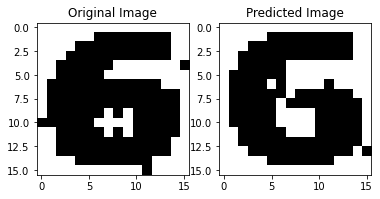

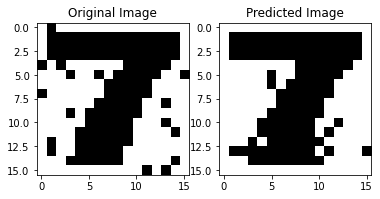

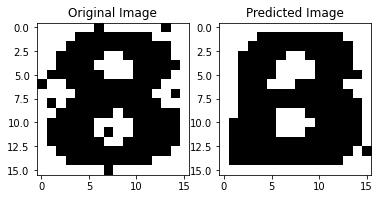

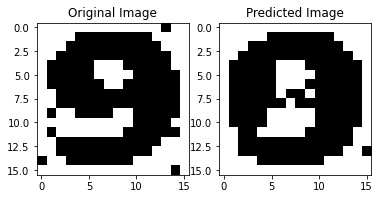

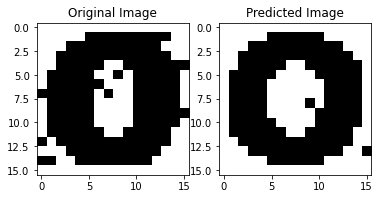

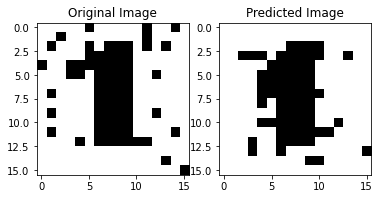

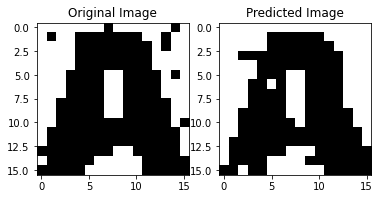

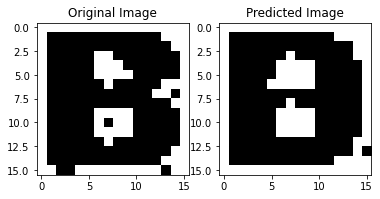

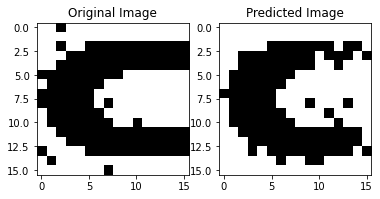

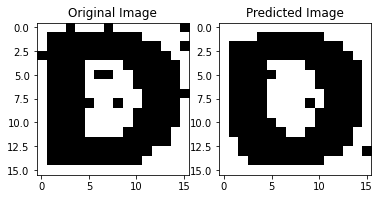

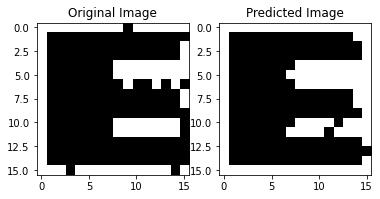

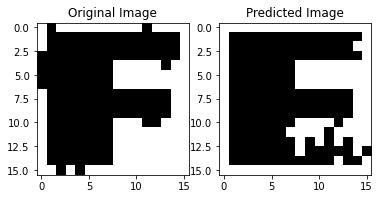

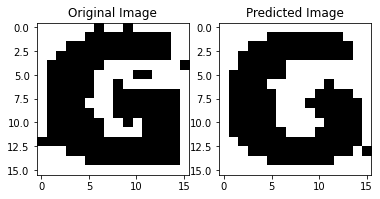

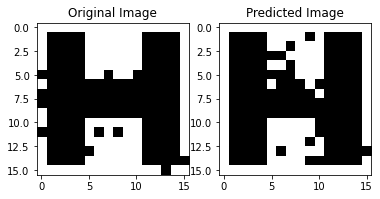

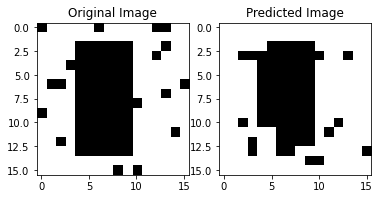

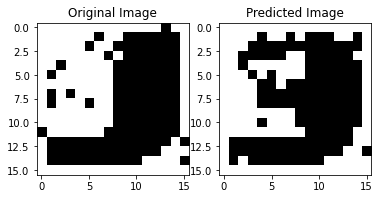

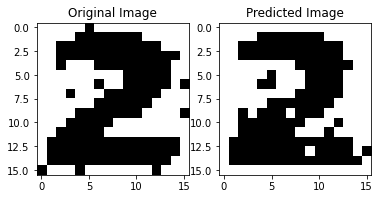

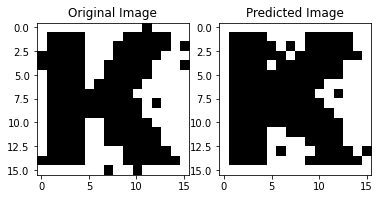

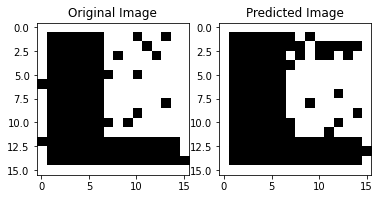

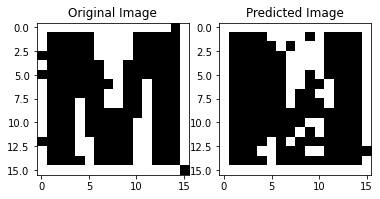

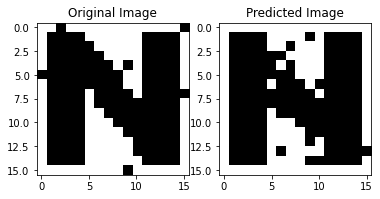

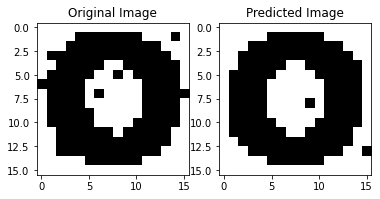

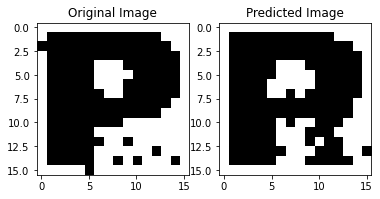

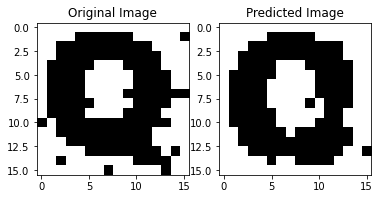

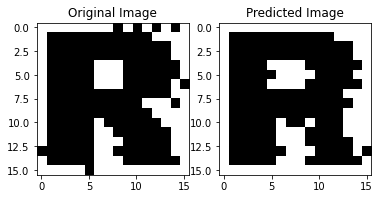

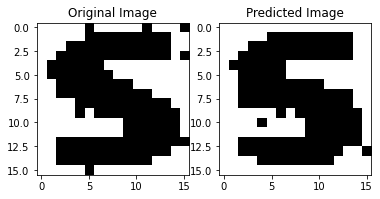

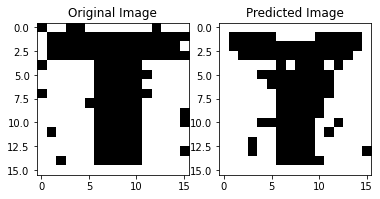

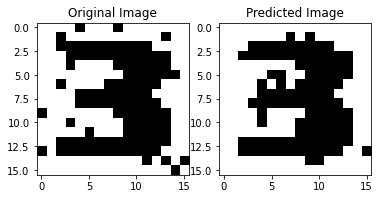

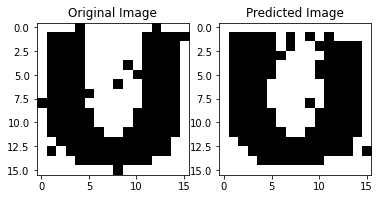

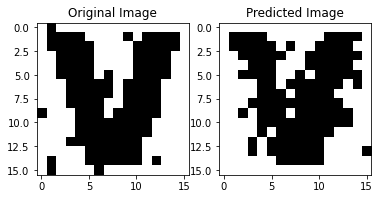

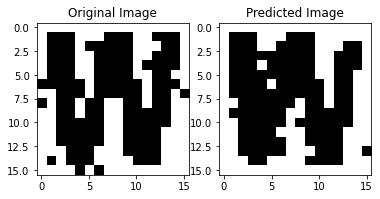

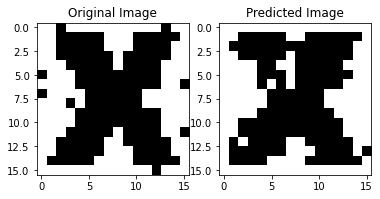

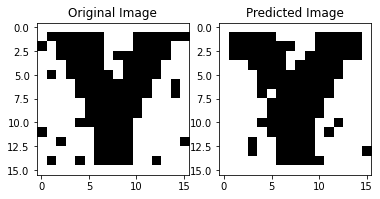

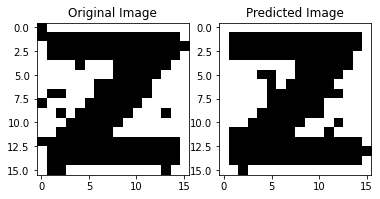

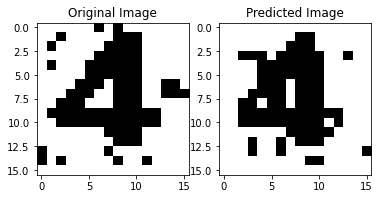

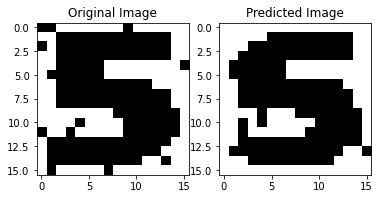

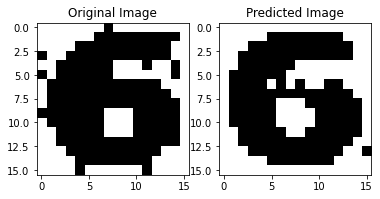

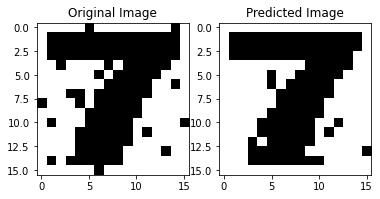

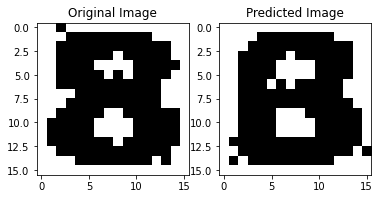

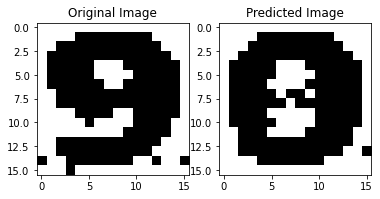

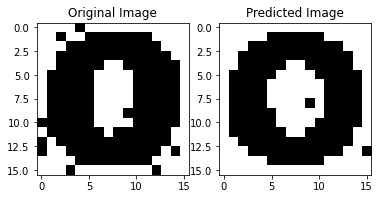

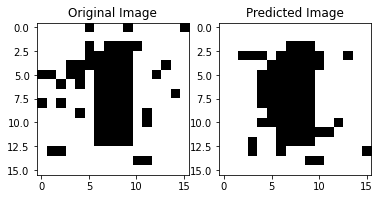

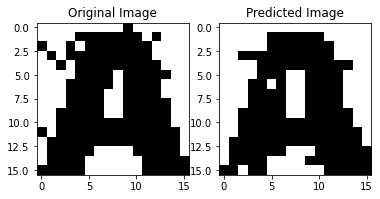

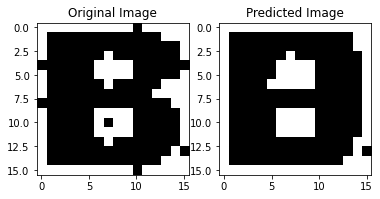

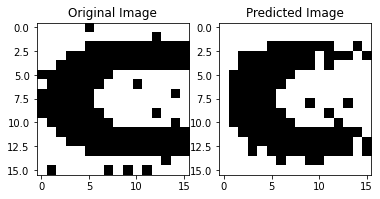

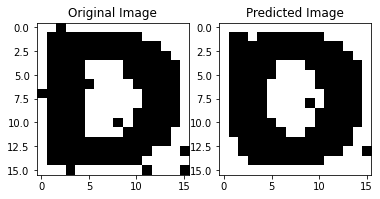

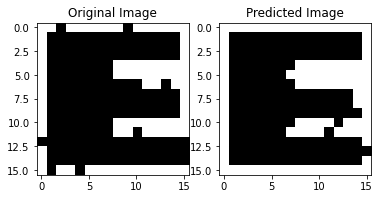

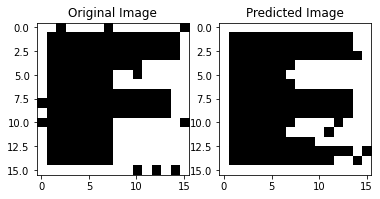

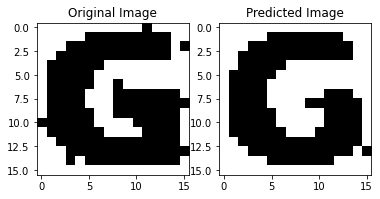

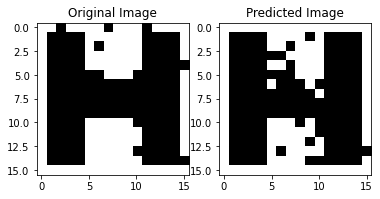

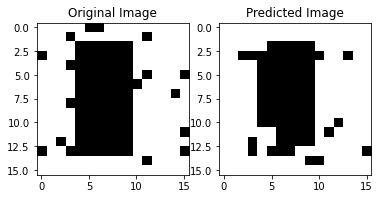

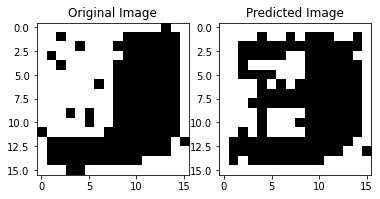

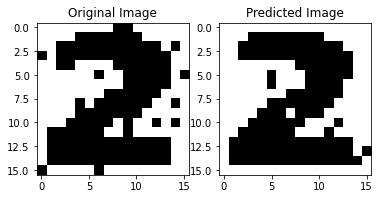

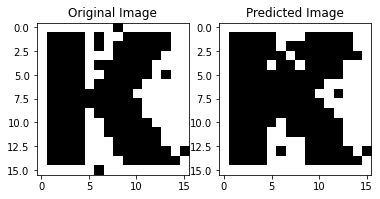

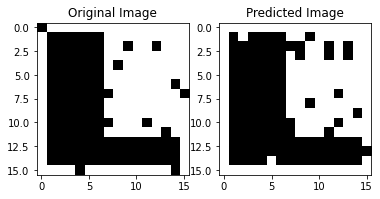

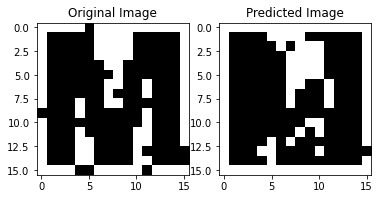

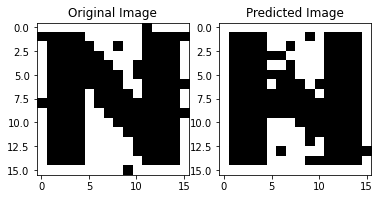

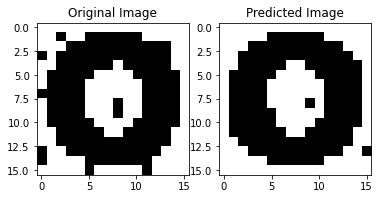

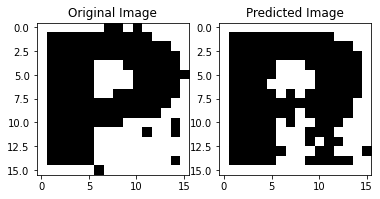

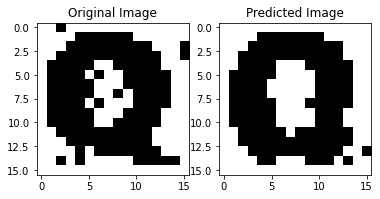

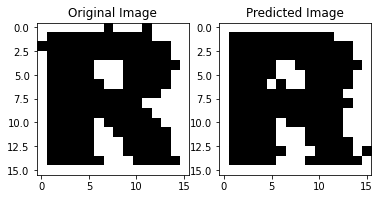

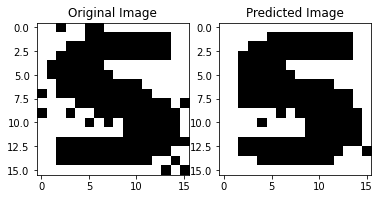

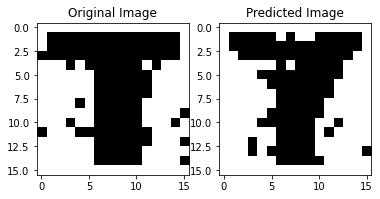

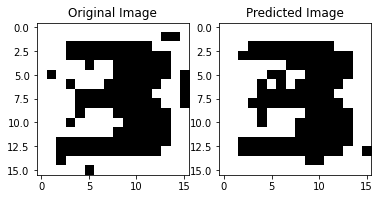

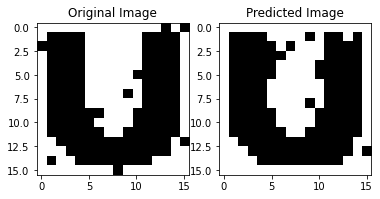

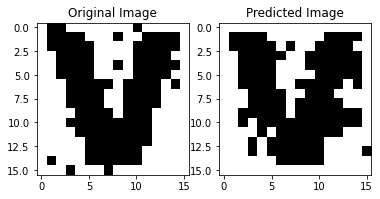

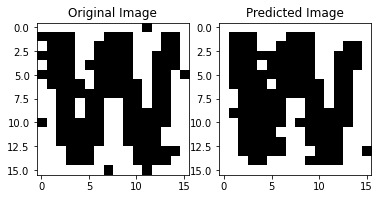

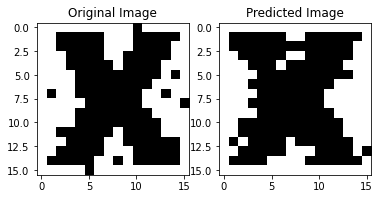

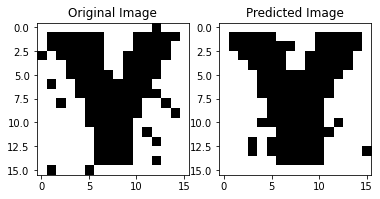

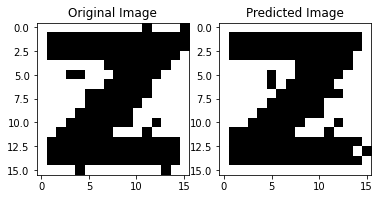

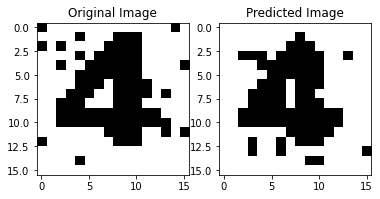

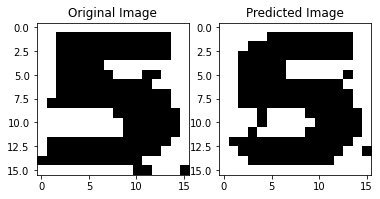

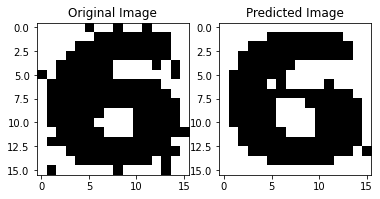

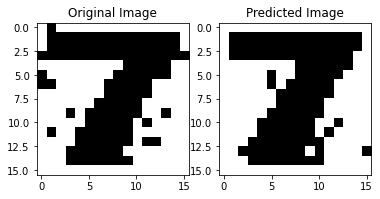

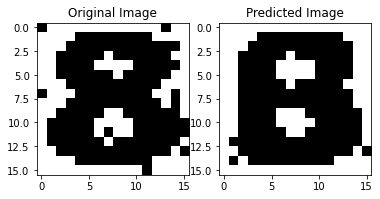

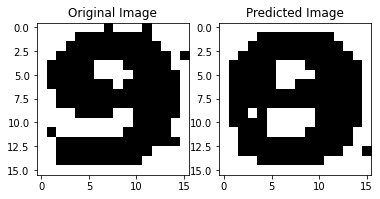

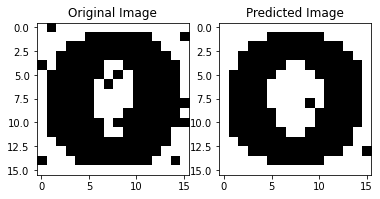

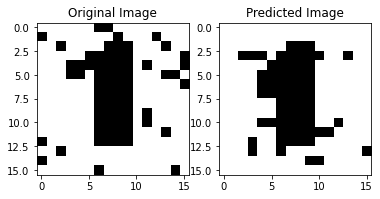

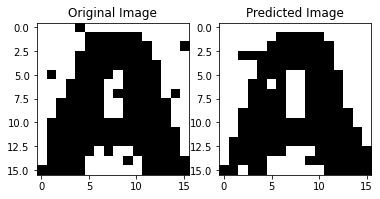

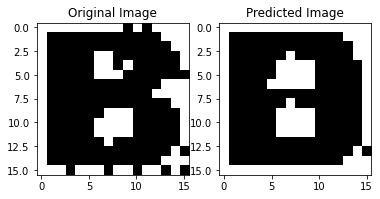

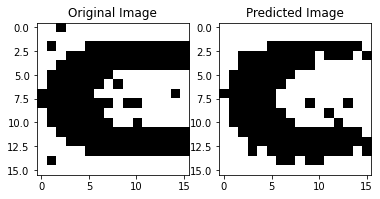

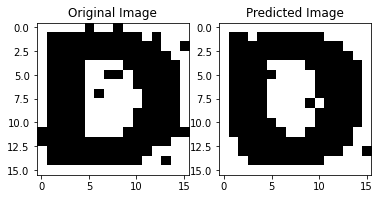

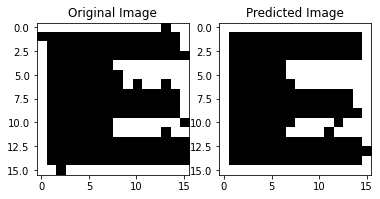

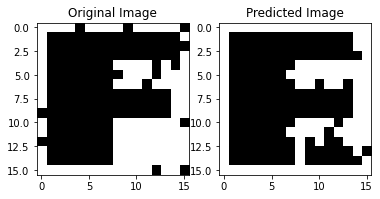

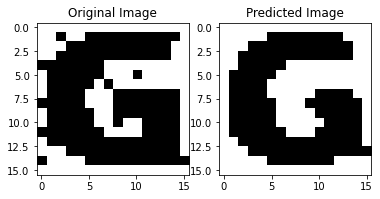

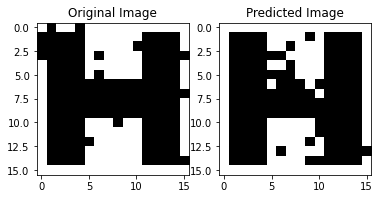

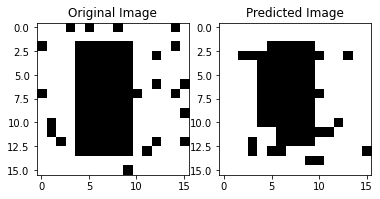

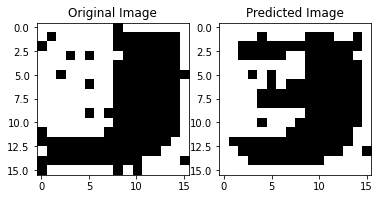

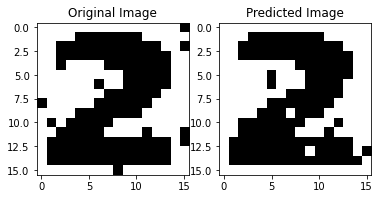

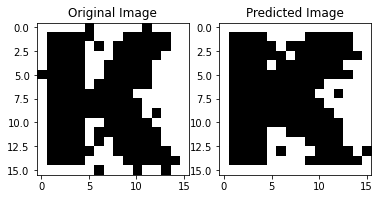

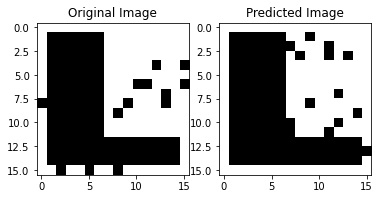

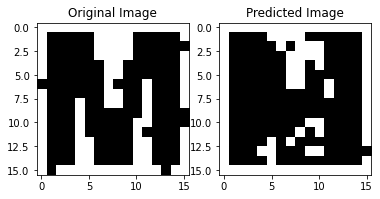

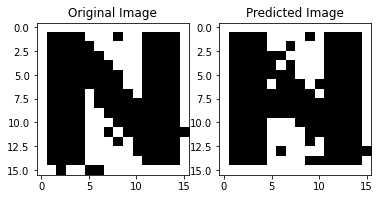

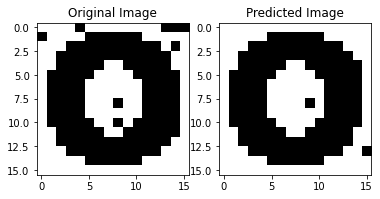

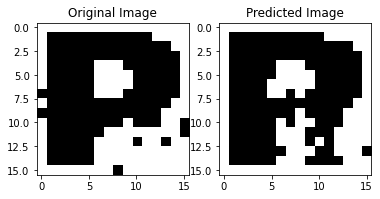

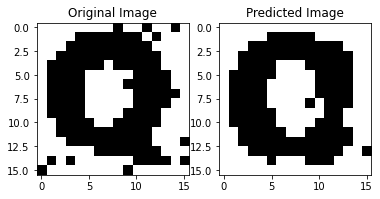

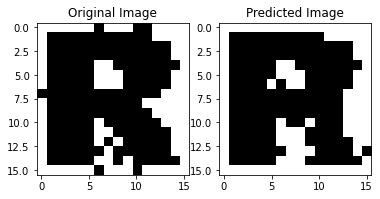

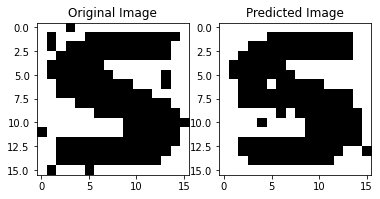

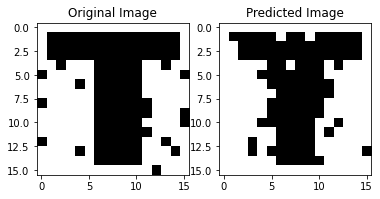

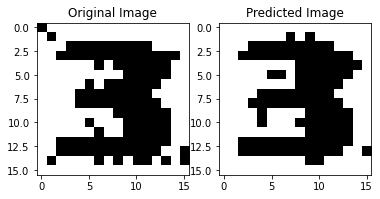

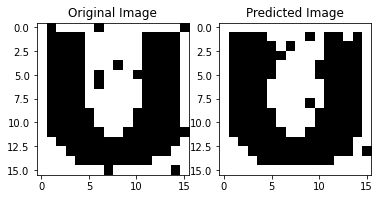

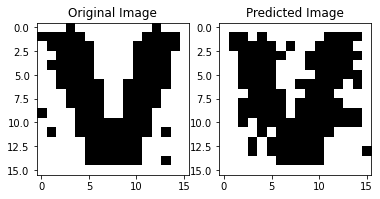

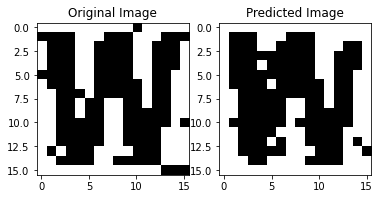

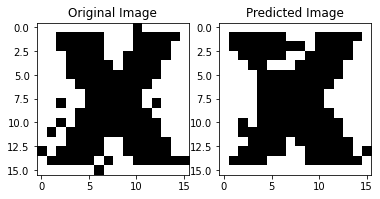

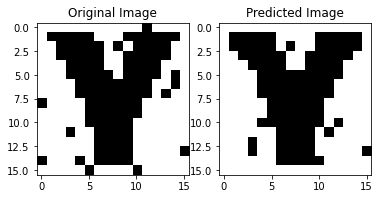

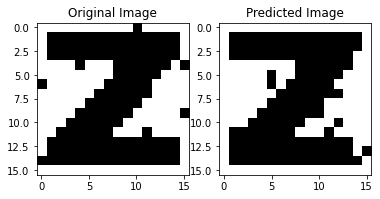

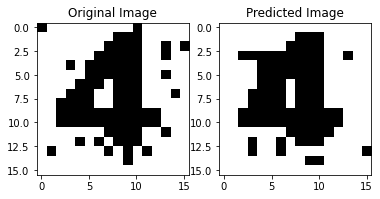

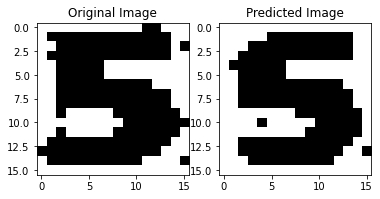

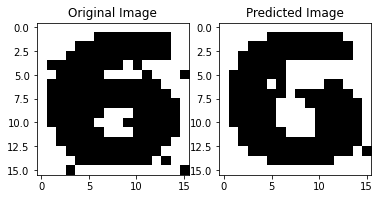

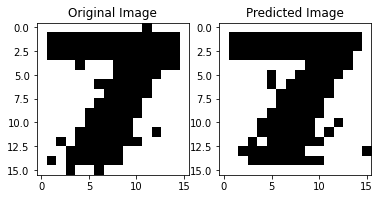

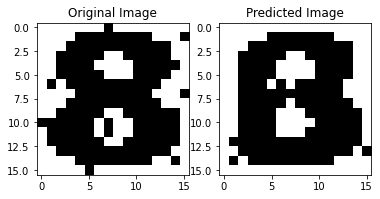

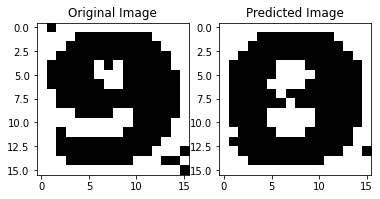

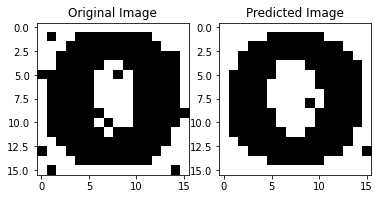

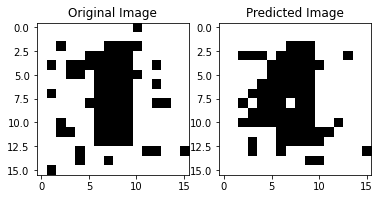

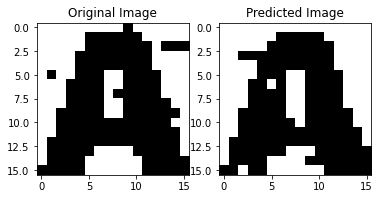

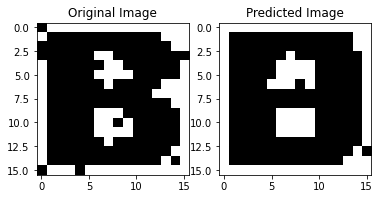

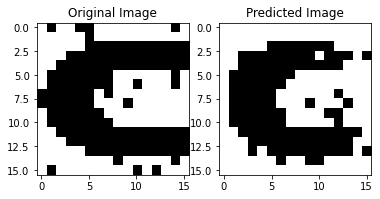

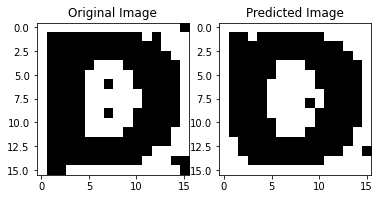

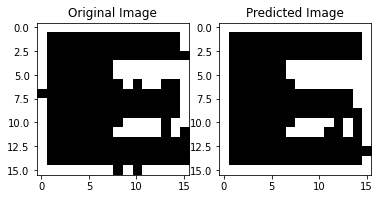

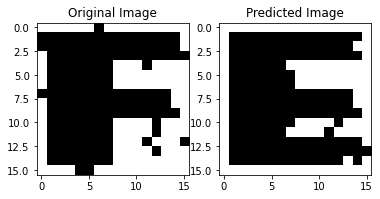

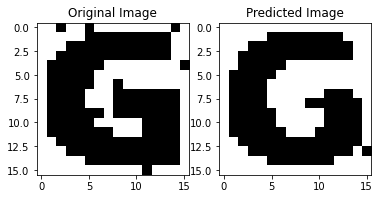

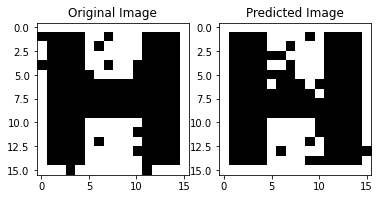

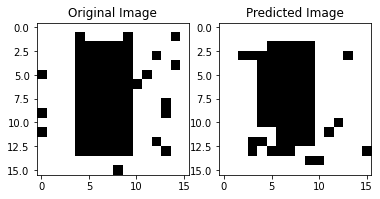

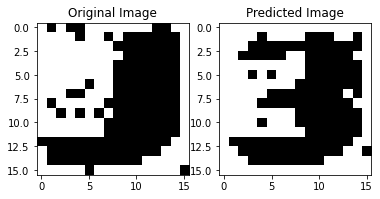

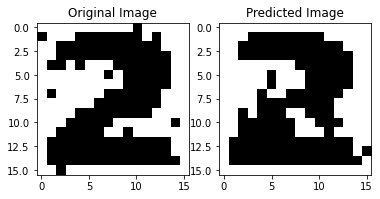

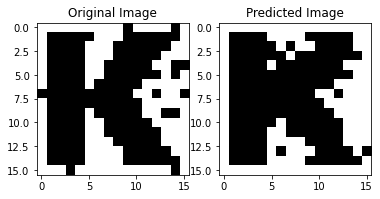

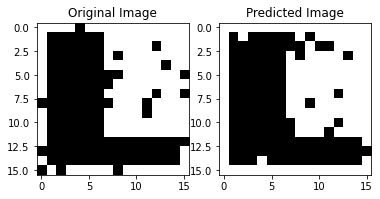

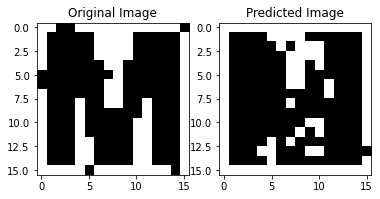

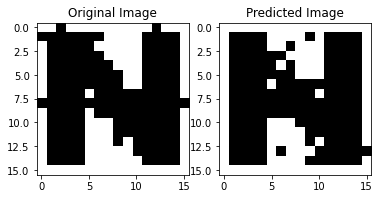

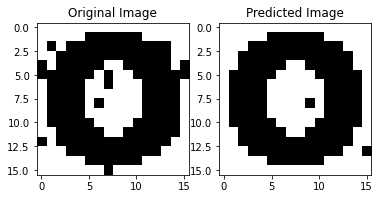

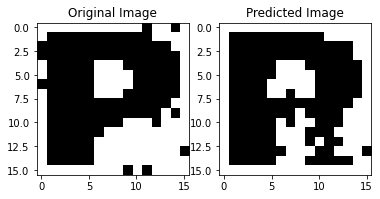

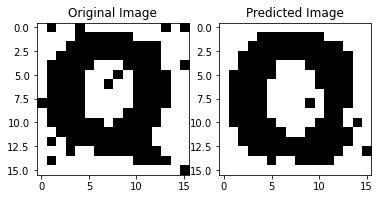

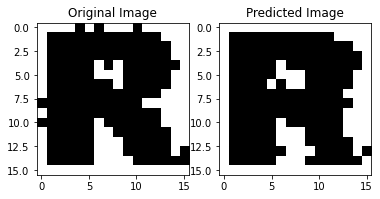

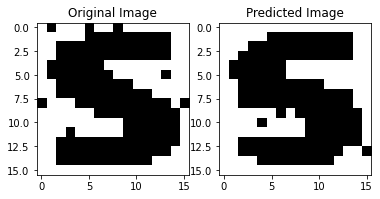

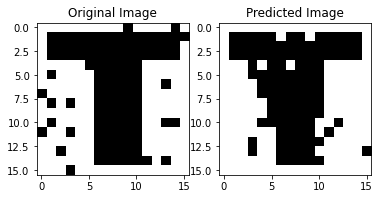

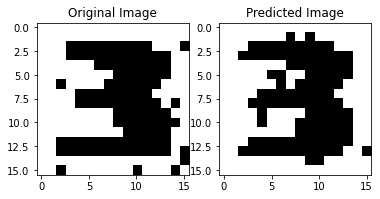

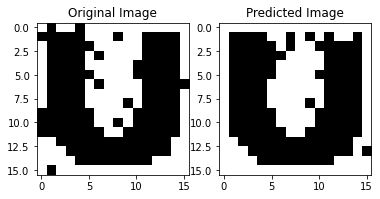

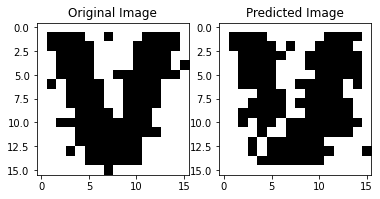

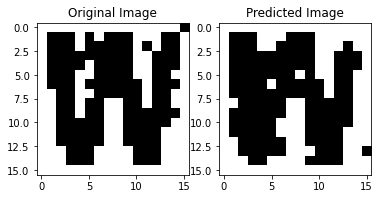

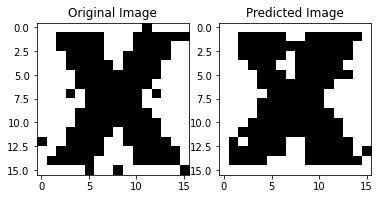

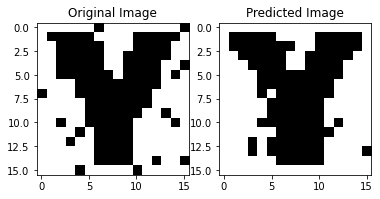

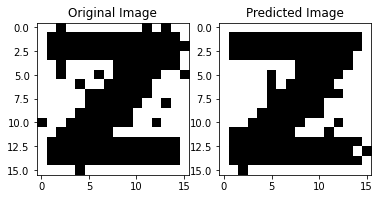

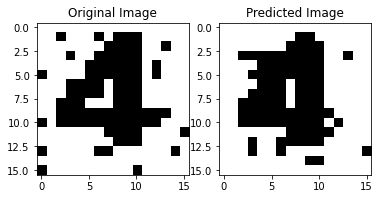

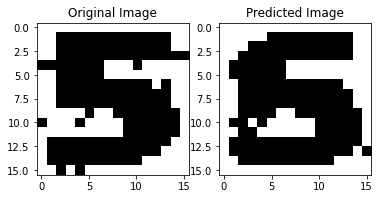

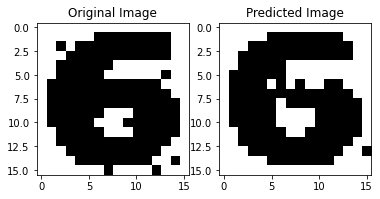

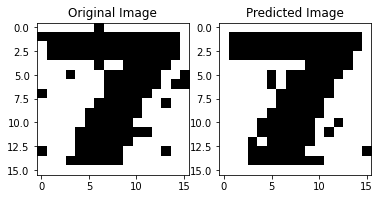

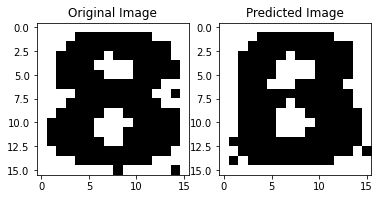

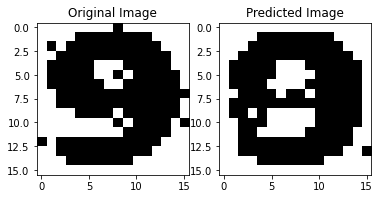

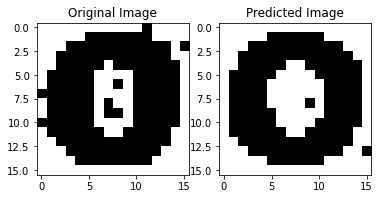

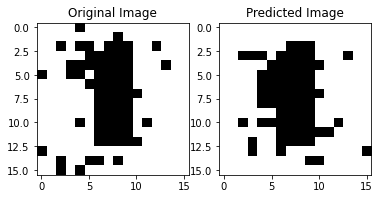

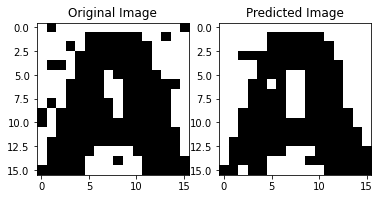

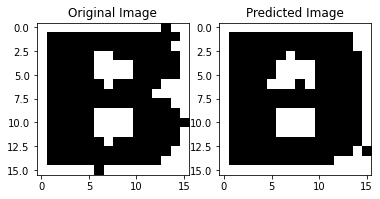

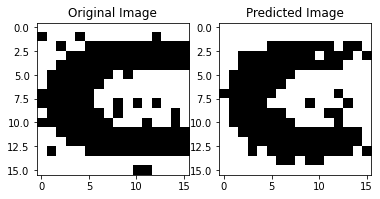

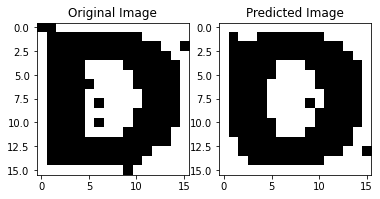

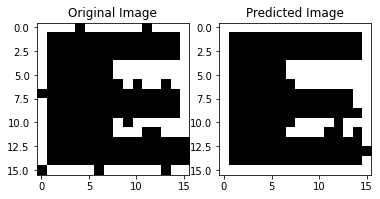

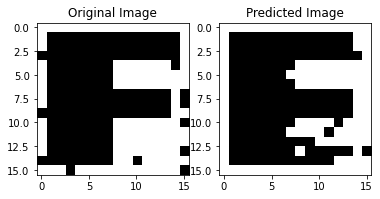

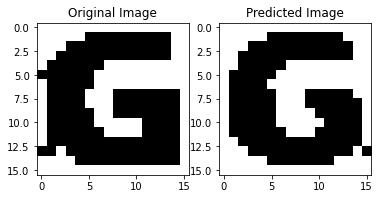

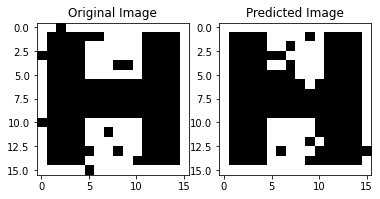

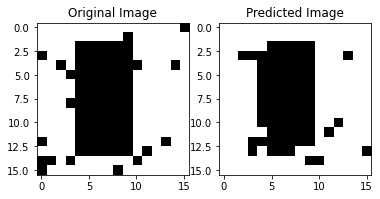

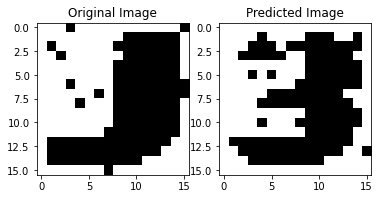

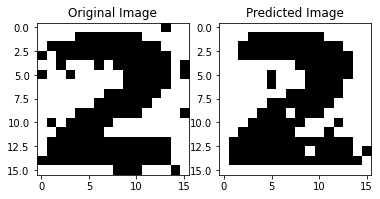

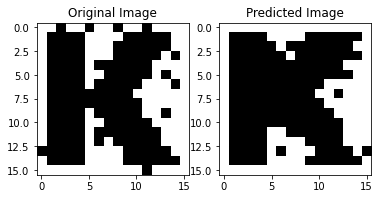

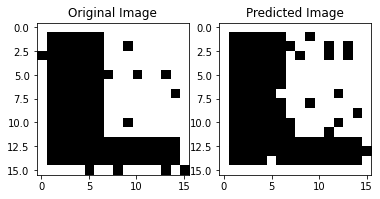

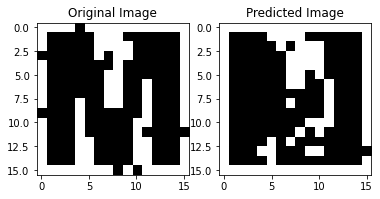

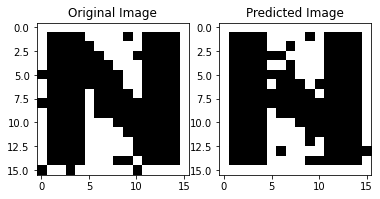

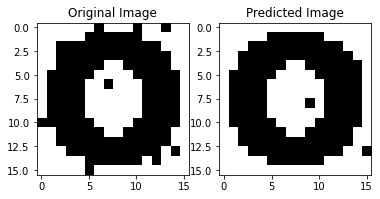

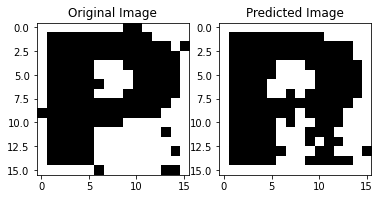

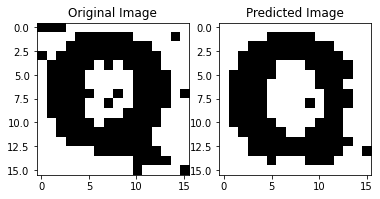

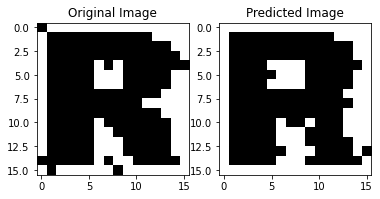

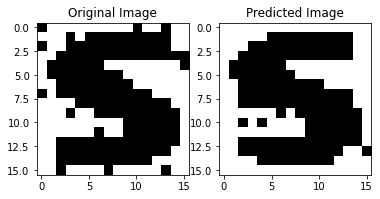

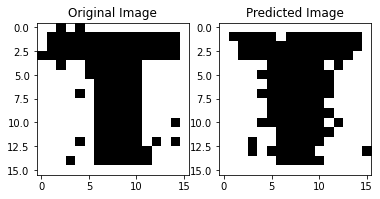

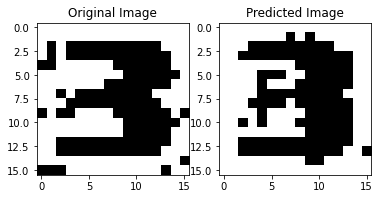

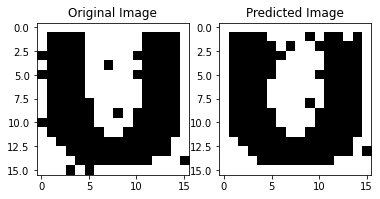

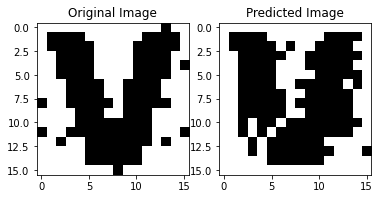

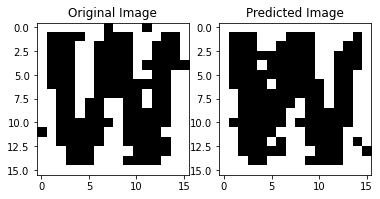

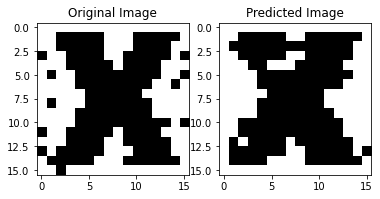

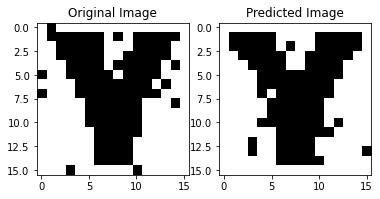

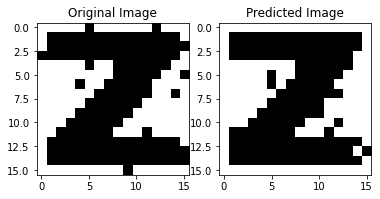

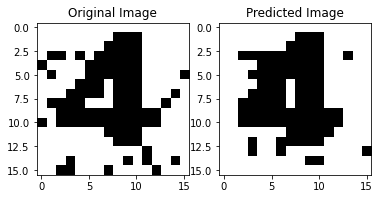

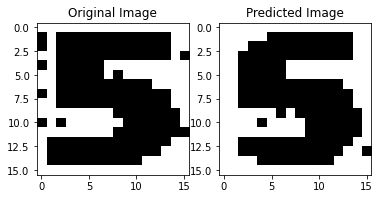

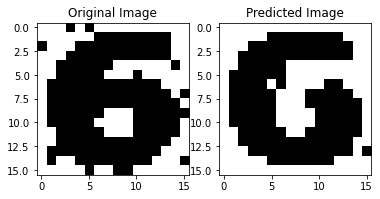

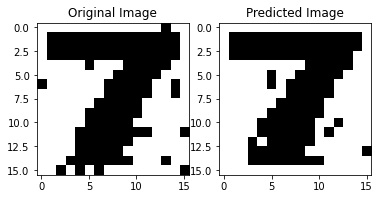

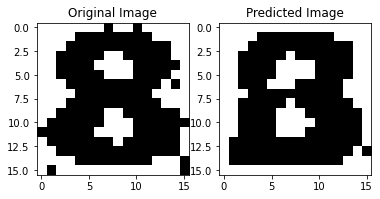

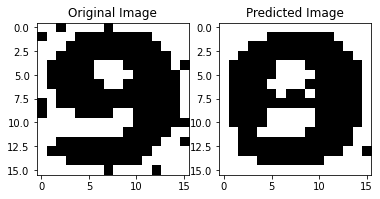

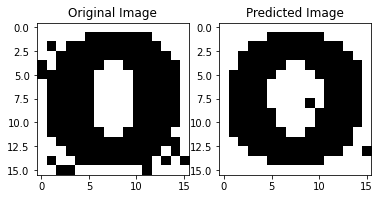

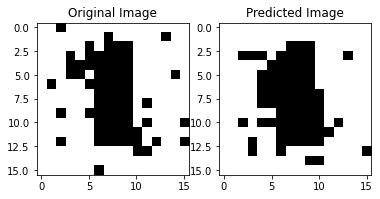

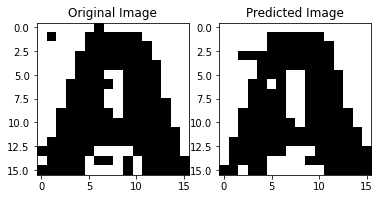

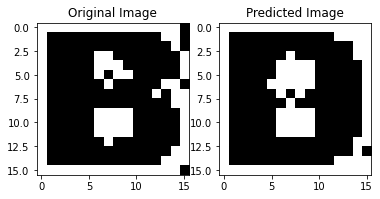

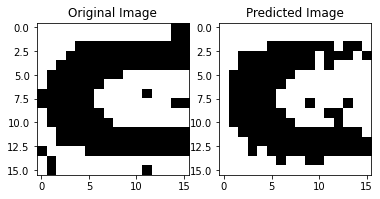

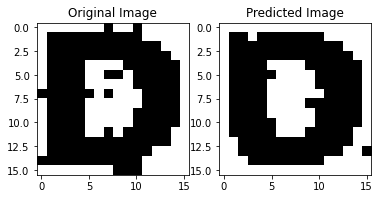

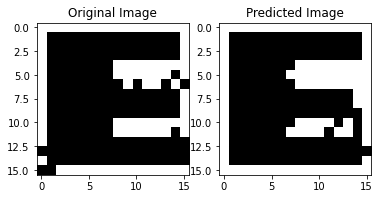

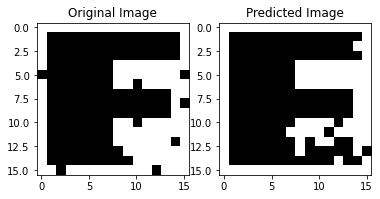

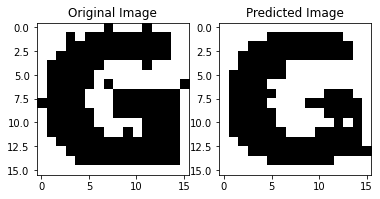

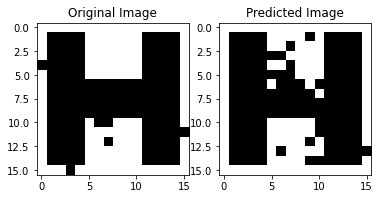

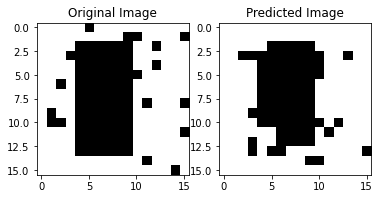

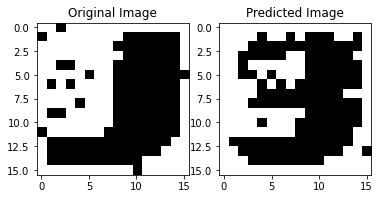

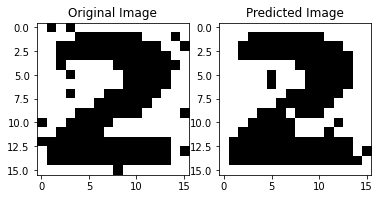

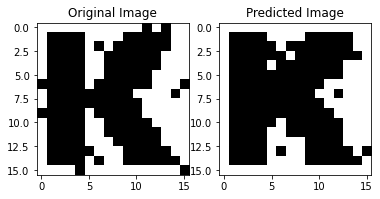

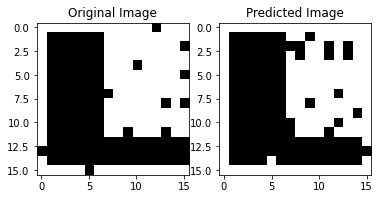

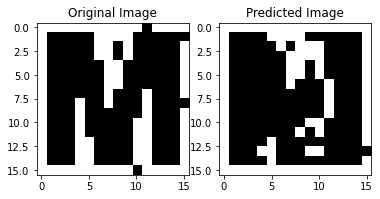

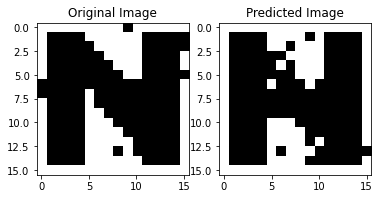

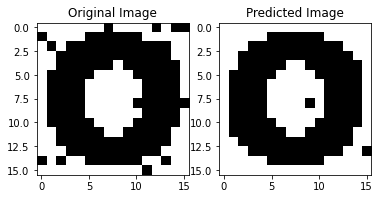

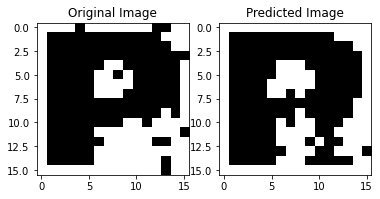

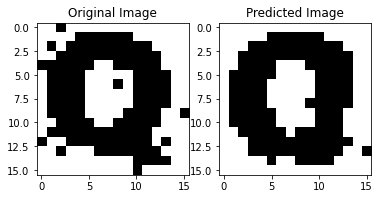

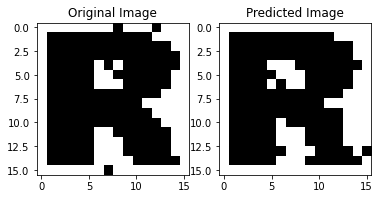

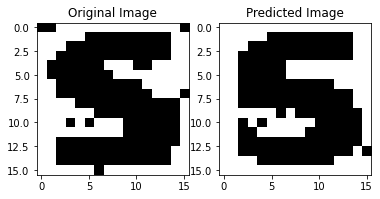

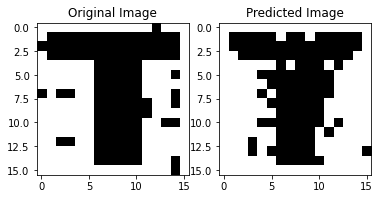

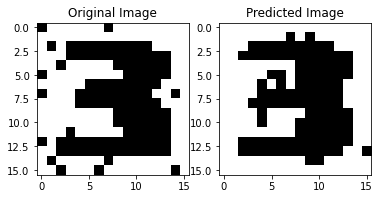

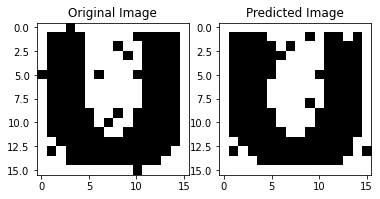

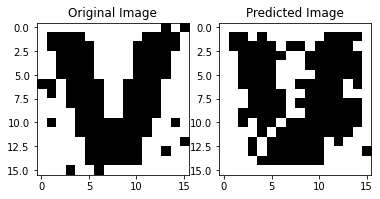

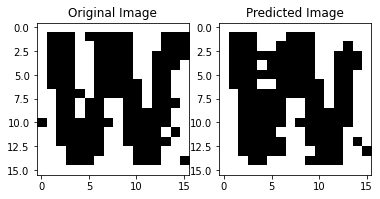

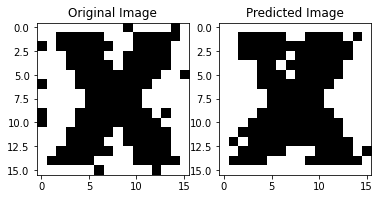

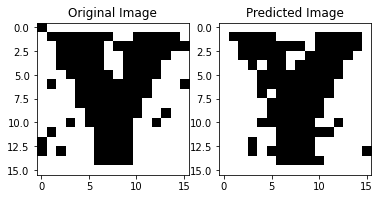

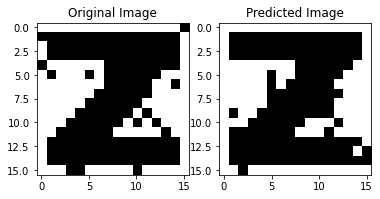

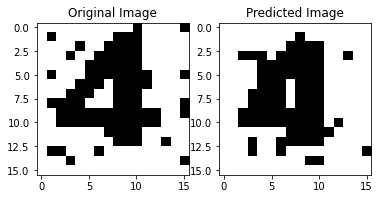

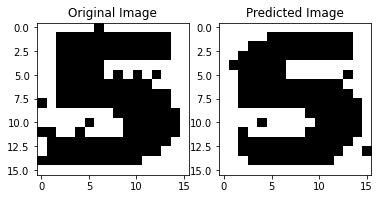

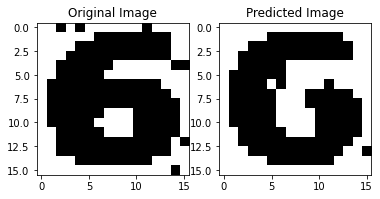

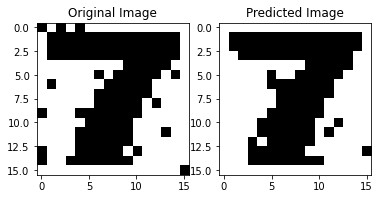

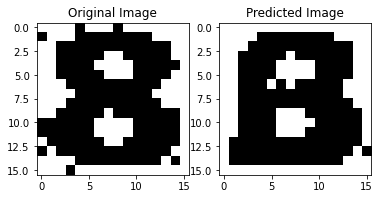

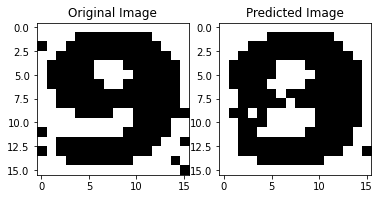

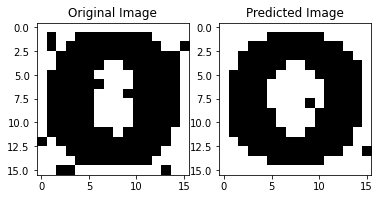

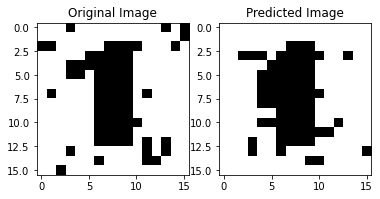

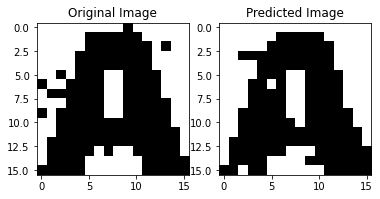

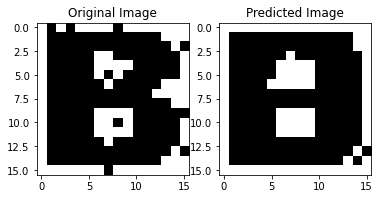

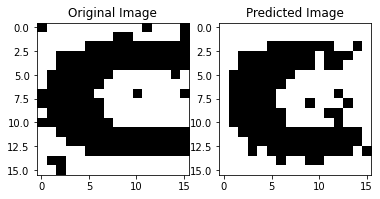

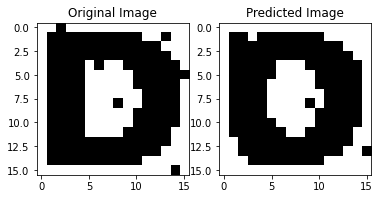

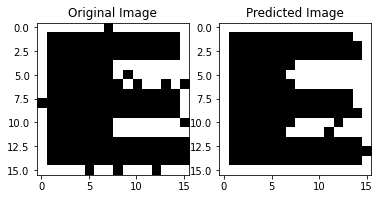

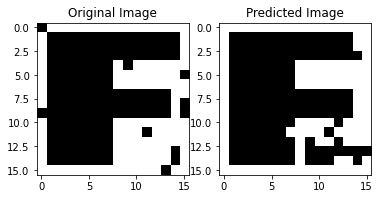

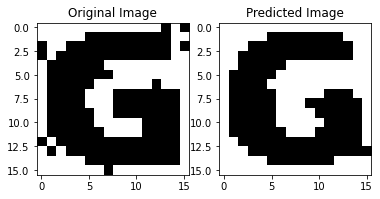

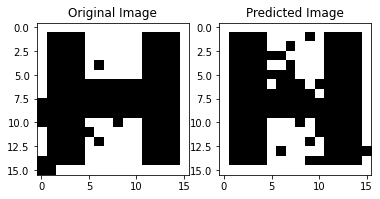

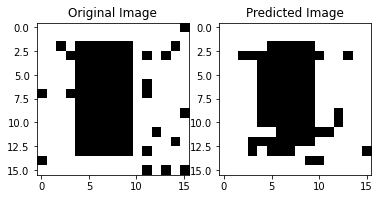

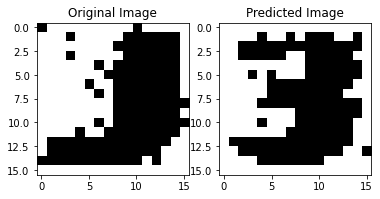

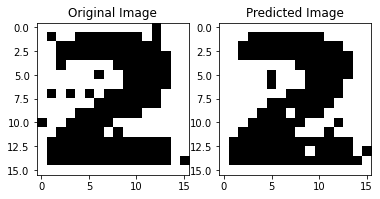

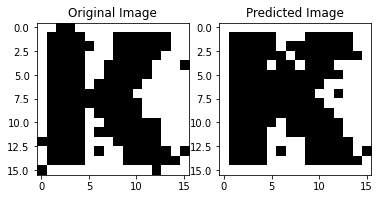

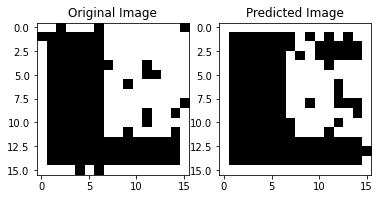

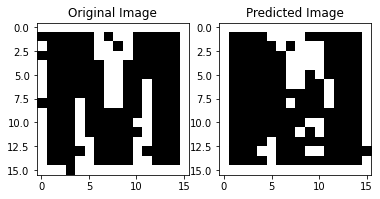

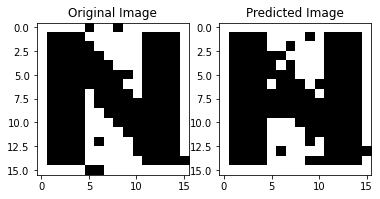

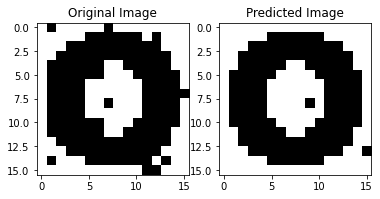

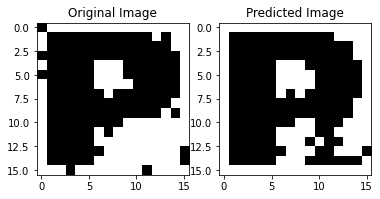

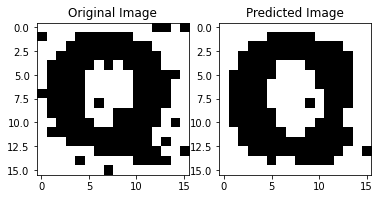

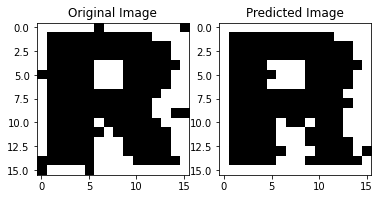

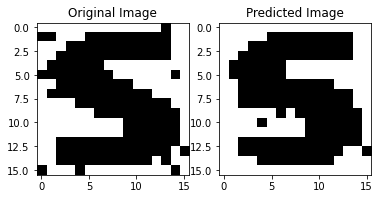

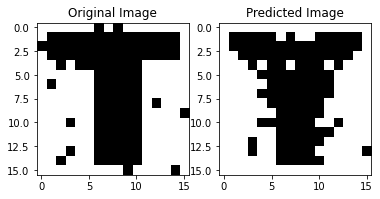

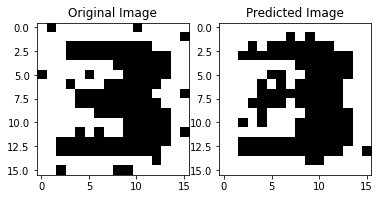

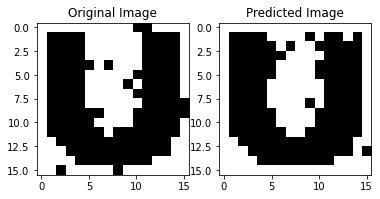

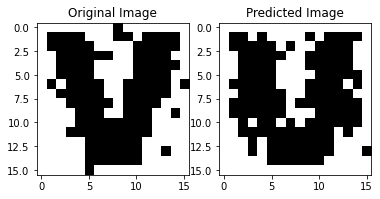

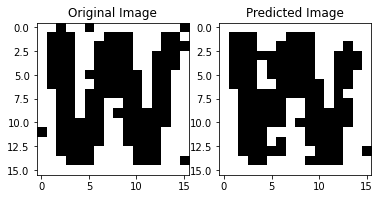

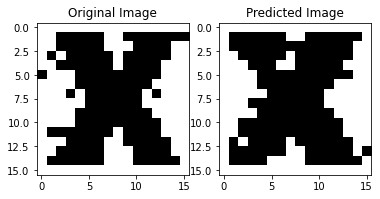

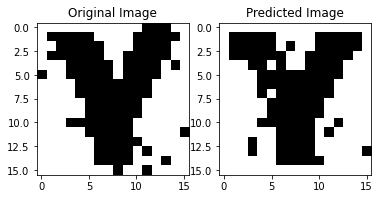

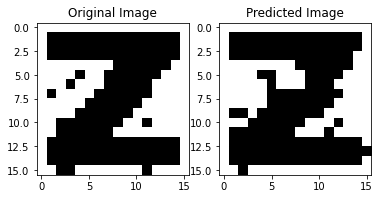

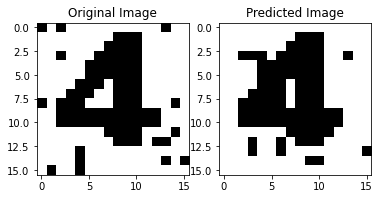

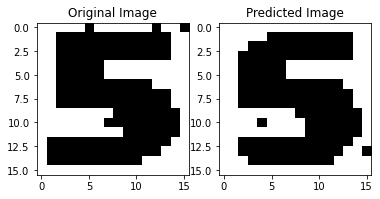

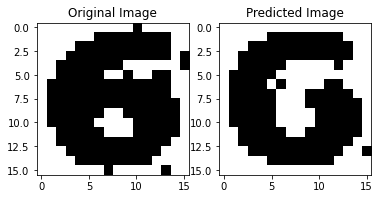

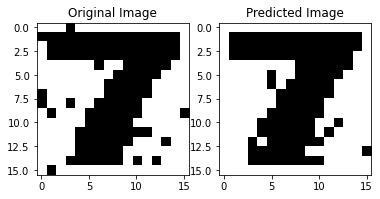

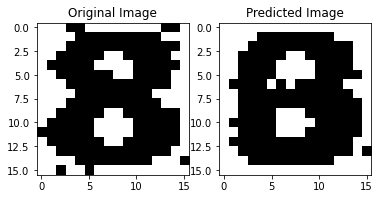

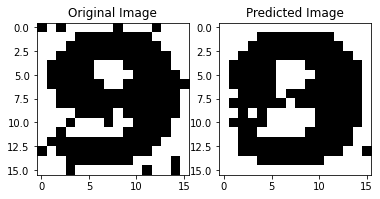

In [10]:
#------- Predicting the noisy images of dataset 1 with the model 1 --------------#
ds1_noisy_model_prediction_data = {}
print("Predictions for Noisy data with Standard Deviation")
for std in STANDARD_DEVIATIONS:
    ds1_noisy_model = imagetensor(f"{NOISY_DATASET_1}{std}/")
    ds1_noisy_model = ds1_noisy_model.reshape(ds1_noisy_model.shape[0],1,256)
    ds1_noisy_model = convert_array_to_0_and_1(ds1_noisy_model)

    ds1_noisy_predict = ds1_model.predict(ds1_noisy_model)
    ds1_noisy_predict = convert_array_to_0_and_1(ds1_noisy_predict)
    
    ds1_noisy_model_prediction_data[std] = ds1_noisy_predict
    display(ds1_noisy_model, ds1_noisy_predict,True)

Predicting Noise Added Images over Original Images for Dataset 2

In [11]:
#------- Predicting the noisy images of dataset 2 with the model 2 --------------#
ds2_noisy_model_prediction_data = {}
print("Predictions for Noisy data with Standard Deviation")
for std in STANDARD_DEVIATIONS:
    ds2_noisy_model = imagetensor(f"{NOISY_DATASET_2}{std}/")
    ds2_noisy_model = ds2_noisy_model.reshape(ds2_noisy_model.shape[0],1,256)
    ds2_noisy_model = convert_array_to_0_and_1(ds2_noisy_model)

    ds2_noisy_predict = ds2_model.predict(ds2_noisy_model)
    ds2_noisy_predict = convert_array_to_0_and_1(ds2_noisy_predict)
    
    ds2_noisy_model_prediction_data[std] = ds2_noisy_predict
    display(ds2_noisy_model, ds2_noisy_predict,True)

Predictions for Noisy data with Standard Deviation


C:\Users\venky\AppData\Local\Temp\ipykernel_5956\4185480150.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axis= plt.subplots(1,2) if single_line else plt.subplots(2,sharex=True)


Calulation and Graph Generation of Fh and Ffa

In [ ]:
#------- Function for calculating FFA and FH values --------------#
def calculate_fh_ffa(original_data, predicted_data):
    '''
        original_data: Original Image data
        predicted_data: Predicted Image data
        
    '''

    correctly_predicted_black_pixels_count = 0
    wrongly_predicted_black_pixels_count = 0

    whites_original = np.count_nonzero(original_data==1)
    blacks_original = np.count_nonzero(original_data==0)

    for i in range(16):
        for j in range(16):
            if original_data[i][j] == 0 and predicted_data[i][j] == 0:
                correctly_predicted_black_pixels_count += 1
            elif original_data[i][j] == 1 and predicted_data[i][j] == 0:
                wrongly_predicted_black_pixels_count += 1
                
    fh = correctly_predicted_black_pixels_count/blacks_original
    ffa = wrongly_predicted_black_pixels_count/whites_original
    
    return fh,ffa

In [ ]:
#------- Calculating the FFA and FH values for all the Predicted Images for both Trained and Noisy datasets of dataset 1--------------#
ds1_all_metrics = {}
ds1_metric_original = X1_train
ds1_metric_predicted = X1_predict
ds1_noisy_model_prediction_data[0] = ds1_metric_predicted

ds1_metric_original = ds1_metric_original.reshape(ds1_metric_original.shape[0],16,16)

for k,v in ds1_noisy_model_prediction_data.items():

    ds1_metric_predicted = v.reshape(v.shape[0],16,16)
    ds1_all_metrics[k] = {}
    
    for i in range(36):
        ds1_all_metrics[k][i] = calculate_fh_ffa(ds1_metric_original[i],ds1_metric_predicted[i])

In [ ]:
#------- Plotting all the results of Dataset 1 --------------#
plot_data(ds1_all_metrics[0], TITLE_1_NOISELESS, noiseless=True)

plot_data(ds1_all_metrics, TITLE_1_NOISE)

In [ ]:
#------- Calculating the FFA and FH values for all the Predicted Images for both Trained and Noisy datasets of dataset 2--------------#
ds2_all_metrics = {}
ds2_metric_original = X2_train
ds2_metric_predicted = X2_predict
ds2_noisy_model_prediction_data[0] = ds2_metric_predicted

ds2_metric_original = ds2_metric_original.reshape(ds2_metric_original.shape[0],16,16)

for k,v in ds2_noisy_model_prediction_data.items():

    ds2_metric_predicted = v.reshape(v.shape[0],16,16)

    ds2_all_metrics[k] = {}
    
    for i in range(36):
        ds2_all_metrics[k][i] = calculate_fh_ffa(ds2_metric_original[i],ds2_metric_predicted[i])

In [ ]:
#------- Plotting all the results of dataset 2 --------------#
plot_data(ds2_all_metrics[0], TITLE_2_NOISELESS, noiseless=True)

plot_data(ds2_all_metrics, TITLE_2_NOISE)

ROC Curves

In [ ]:
def roc_curve_plot(metrics, title):
    colors = ['#0000ff', '#cc33ff', '#006666', '#cccc00', '#33cc33', '#ff5050', '#cc9900', '#993300', '#009933', '#990000']
    roc_fh_values = {}
    roc_ffa_values = {}
    for std in metrics.keys():
        roc_fh_values[std] = []
        roc_ffa_values[std] = []
        for i in metrics[std].keys():
            roc_fh_values[std].append(metrics[std][i][0])
            roc_ffa_values[std].append(metrics[std][i][1])

    fig,ax = plt.subplots()
    for std, color in zip(metrics.keys(), colors):
        fh = roc_fh_values[std]
        ffa = roc_ffa_values[std]
        fh.sort()
        ffa.sort()

        ax.plot(ffa,fh, color=color, label= f"ROC curve of stddev {std}")
        ax.plot([0, 1], [0, 1], linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.0])
        ax.set_xlabel('Ffa')
        ax.set_ylabel('Fh')
        ax.set_title(title)
        ax.legend(loc="lower right")
    
    plt.show()

In [ ]:
roc_curve_plot(ds1_all_metrics, "ROC curve for Dataset 1")

roc_curve_plot(ds2_all_metrics, "ROC curve for Dataset 2")

Testing Model 1 with Model 2 data

In [ ]:
#------- Predicting the dataset with the trained model --------------#
X3_predict = ds1_model.predict(X2_test)

X3_predict = convert_array_to_0_and_1(X3_predict)
X2_test = convert_array_to_0_and_1(X2_test)
print(X3_predict.shape,X2_test.shape)

#------- Displaying the results of the predictions --------------#
display(X2_test,X3_predict)

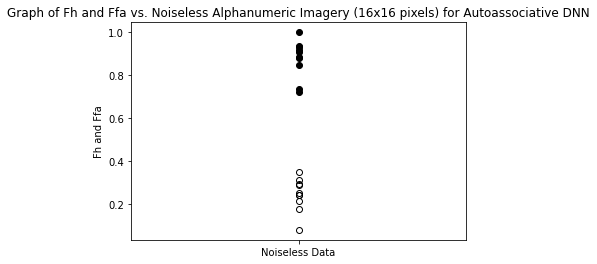

In [ ]:
test_data_all_metrics = {}
test_data_all_metrics[0] = {}
test_data_metric_original = X2_train
test_data_metric_predicted = X3_predict

test_data_metric_original = test_data_metric_original.reshape(test_data_metric_original.shape[0],16,16)
test_data_metric_predicted = test_data_metric_predicted.reshape(test_data_metric_predicted.shape[0],16,16)

for i in range(36):
    test_data_all_metrics[0][i] = calculate_fh_ffa(test_data_metric_original[i],test_data_metric_predicted[i])


#------- Plotting all the results of Test Dataset --------------#
plot_data(test_data_all_metrics[0], TITLE_3_NOISELESS, noiseless=True)

In [ ]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]

[[row[i] for row in matrix] for i in range(3)]

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]

In [ ]:
from collections import Counter

days = ["M", "T", "W", "TH"]
c = Counter(days)

for x in range(1,5,2):
    d = x % 3
    c.update([days[d]]*x)

c

Counter({'M': 4, 'T': 2, 'W': 1, 'TH': 1})

In [ ]:
class a:
    def __init__(self,n):
        self.n = n
    def t(self):
        return f"my nmae is {self.n}"
class c(a):
    def t(self):
        sp = super().t()
        return f"m {sp}"
c(n="fido").t()

'm my nmae is fido'

In [ ]:
d = {1:1,2:2}
i = d.items()

d.pop(1)

print(i)

dict_items([(2, 2)])
